# Plantillas desde SXS
Primero instalamos la libreria sxs `!pip install sxs -q`

In [ ]:
!pip install sxs -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.4/224.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 784.2/784.2 kB 17.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.1/250.1 kB 4.7 MB/s eta 0:00:00


In [ ]:
import sxs # import sxs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.interpolate
from scipy.interpolate import interp1d, lagrange, CubicSpline, PchipInterpolator
import scipy.constants as const
from scipy.optimize import newton,bisect
from scipy.integrate import solve_ivp

%config InlineBackend.figure_format = 'retina'

In [ ]:
sxs_bbh_0305 = sxs.load("SXS:BBH:0305")
w = sxs_bbh_0305.h

Loading SXS simulations using latest tag 'v3.0.0', published at 2025-05-14T18:17:30Z.


  0%|          | 0/5589954 [00:00<?, ?it/s]

  0%|          | 0/486 [00:00<?, ?it/s]

  0%|          | 0/1793186 [00:00<?, ?it/s]

`w.metadata` los datos de los datos

In [ ]:
print('tipo de objetos: '+ str(w.metadata.object_types))

tipo de objetos: BHBH


In [ ]:
t0 = w.metadata.reference_time # tiempo de referencia, al inicio hay "junk radiation"
print(f't0 = {t0}')

t0 = 1375.5


In [ ]:
w.data # todos los multipolos

array([[-6.08756498e-02-1.03749838e-02j, -2.41767934e-03+1.33542406e-02j,
        -1.64394083e-03-3.75265786e-06j, ...,
        -2.95725132e-04+5.22237916e-04j,  2.78079796e-03+8.29943753e-04j,
         2.50602698e-04+1.68353454e-04j],
       [-6.40735522e-02-1.31167911e-02j, -3.48002319e-03+9.32264275e-03j,
        -5.03610157e-03-2.31076443e-06j, ...,
        -2.15370243e-04+1.19481812e-03j,  1.34881910e-03-4.17077557e-04j,
        -5.37740065e-05-7.94640111e-05j],
       [-6.65156314e-02-1.56924548e-02j, -2.53493403e-03+2.19838273e-03j,
        -8.05778633e-03-1.64970492e-06j, ...,
        -2.06140344e-06+1.43353933e-03j, -4.14711405e-04-1.28144381e-03j,
        -3.42189973e-04-2.59264884e-04j],
       ...,
       [ 4.79523837e-05+1.28127898e-04j, -8.09173930e-08+7.91554779e-08j,
         8.01785441e-02+1.89402223e-10j, ...,
         5.08097345e-08-3.34875639e-08j, -1.04881552e-09+1.11191059e-09j,
        -7.08001448e-08+3.99441588e-08j],
       [ 4.78265201e-05+1.28176042e-04j, -8.

In [ ]:
ell, m = 2 , 2 # seleccionar el multipolo
i22 = w.index(ell, m) # seleccionar el indice del multipolo correspondiente
print(i22)
# guardar la onda 2 2 en w_2_2
w_2_2 = w[:, i22]
w_2_0 = w[:, 0]

4


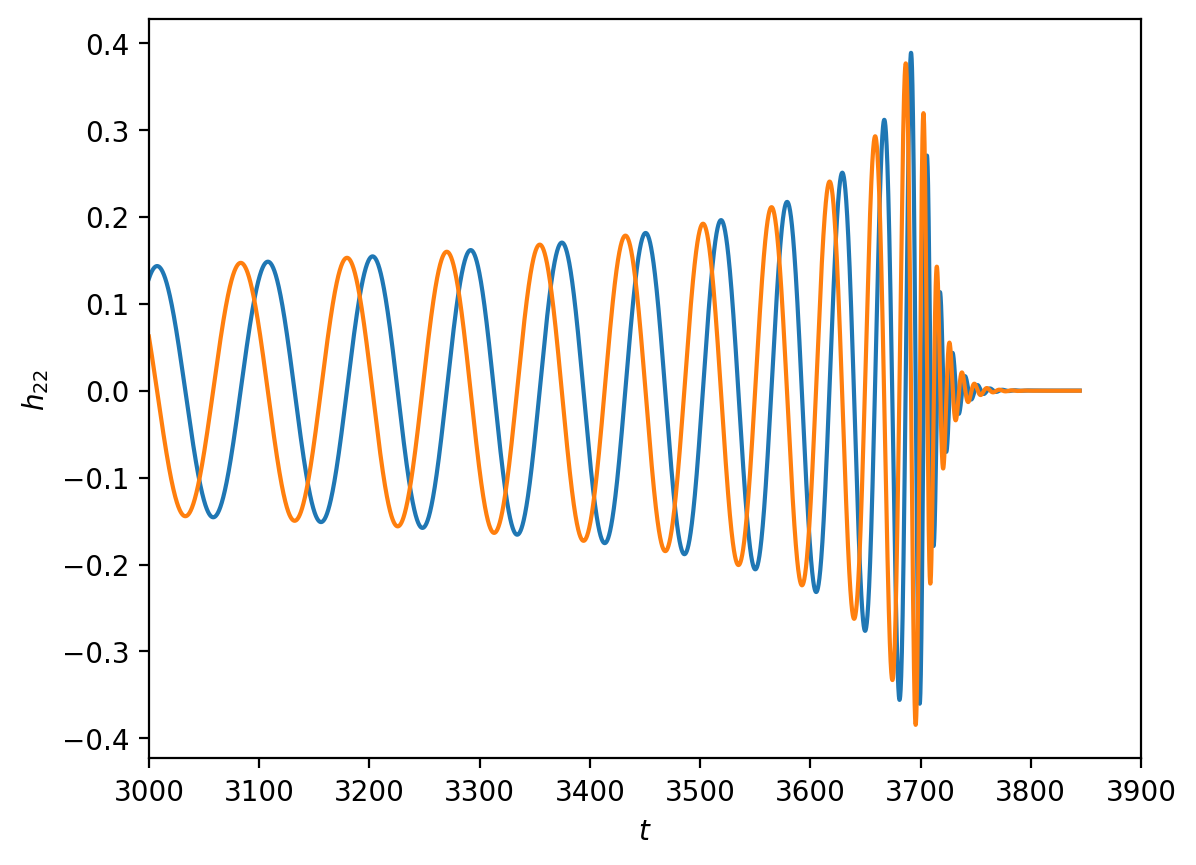

In [ ]:
plt.figure()
plt.plot(w.t, np.real(w_2_2))
plt.plot(w.t, np.imag(w_2_2))
plt.xlim(3000,3900)
plt.xlabel(r'$t$')
plt.ylabel(r'$h_{22}$')
plt.show()

In [ ]:
phi = np.angle(w_2_2)

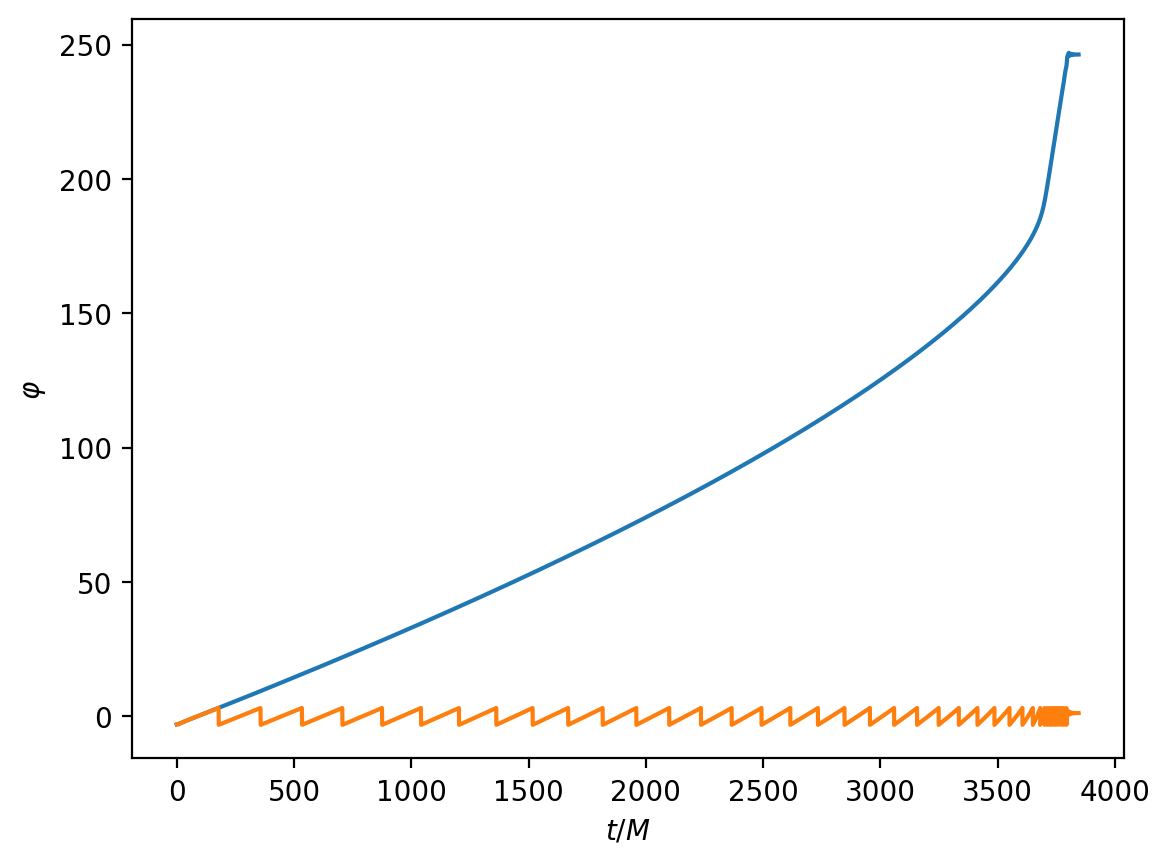

In [ ]:
#plt.plot(w_2_2.t, -phi)
plt.plot(w_2_2.t, np.unwrap(-phi))
plt.plot(w_2_2.t, -phi)
plt.xlabel(r'$t/M$')
#plt.xlim(3500,)
#plt.ylim(200,)
plt.ylabel(r'$\varphi$')
plt.show()

In [ ]:
sxs_bns_0001 = sxs.load("SXS:NSNS:0001")
w_bns = sxs_bns_0001.h

  0%|          | 0/2537221 [00:00<?, ?it/s]

In [ ]:
print('tipo de objetos: '+w_bns.metadata.object_types)

tipo de objetos: NSNS


In [ ]:
w_bns.metadata.reference_time

392

I.Describir el sistema físico: masas, espín, que clase de objetos son.


II.Describir como se seleccionan los datos para estudiar la fase de las ondas, fase vs tiempo\
  A. Cuántos datos hay\
  B. Máximo y mínimos.\
  C. Paso constante?\
  D.Cómo responden estas preguntas con python.\

III.Realizar las interpolaciones:\
A.Lagrange (utilizar 10-20 puntos)\
B.Spline cúbico (diferentes condiciones de frontera)\
C.PCHIP\
IV.Comparar gráficamente las interpolaciones

V.Crear grupo de entrenamiento y grupo de prueba. Cómo crearon cada grupo.

VI.Graficar los errores de cada metodo SE y AE. Calcular MSE y MAE.

VII.Cuál es el mejor método?

In [ ]:
import sxs

sim = sxs.load("SXS:BBH:0305")
meta = sim.metadata

# Ver todas las claves disponibles en los metadatos
print(meta.keys())


odict_keys(['simulation_name', 'keywords', 'alternative_names', 'metadata_format_revision', 'metadata_content_revision', 'internal_minor_version', 'internal_changelog', 'citation_dois', 'initial_separation', 'initial_orbital_frequency', 'initial_adot', 'initial_ADM_energy', 'initial_ADM_linear_momentum', 'initial_ADM_angular_momentum', 'initial_dimensionless_spin1', 'initial_dimensionless_spin2', 'initial_data_type', 'initial_mass1', 'initial_mass2', 'object1', 'object2', 'initial_position1', 'initial_position2', 't_relaxed_algorithm', 'relaxation_time', 'reference_time', 'reference_dimensionless_spin1', 'reference_mass1', 'reference_dimensionless_spin2', 'reference_mass2', 'reference_position1', 'reference_position2', 'reference_orbital_frequency', 'common_horizon_time', 'number_of_orbits_from_start', 'number_of_orbits_from_reference_time', 'reference_eccentricity', 'reference_mean_anomaly', 'remnant_mass', 'remnant_dimensionless_spin', 'remnant_velocity', 'spec_revisions', 'spells_re

In [ ]:
# Clase de objetos
print("Clase de objetos:", meta["object_types"])

# Masas iniciales (referidas a un tiempo de referencia)
print("Masa agujero negro 1:", meta["reference_mass1"])
print("Masa agujero negro 2:", meta["reference_mass2"])
print("Razón de masas q = m1/m2:", meta["reference_mass_ratio"])

# Espines iniciales
spin1_init = meta["initial_dimensionless_spin1"]
spin2_init = meta["initial_dimensionless_spin2"]

print("Espín inicial BH1:", spin1_init)
print("Espín inicial BH2:", spin2_init)


# Agujero negro final (remnant)
print("Masa final:", meta["remnant_mass"])
print("Espín final (adimensional):", meta["remnant_dimensionless_spin"])


Clase de objetos: BHBH
Masa agujero negro 1: 0.5498023657759457
Masa agujero negro 2: 0.4502139397435628
Razón de masas q = m1/m2: 1.2212024489714988
Espín inicial BH1: [3.2772e-12, -9.165e-13, 0.3300000041229183]
Espín inicial BH2: [-2.778e-13, -1.44e-13, -0.4400000049306194]
Masa final: 0.9520329397043087
Espín final (adimensional): [5.253958683511938e-08, -2.4567336559285058e-08, 0.6920851868170271]


In [ ]:
#Segundo punto
len(w_2_2)
len(w_2_2)
print("Número total de datos:", len(w_2_0))

Número total de datos: 13746


In [ ]:
#B
phase = np.unwrap(-np.angle(w_2_2))

t_min, t_max = w.t.min(), w.t.max()
phase_min, phase_max = phase.min(), phase.max()

print("Tiempo mínimo:", t_min)
print("Tiempo máximo:", t_max)
print("Fase mínima:", phase_min)
print("Fase máxima:", phase_max)

Tiempo mínimo: 0.4802217393588517
Tiempo máximo: 3844.4210478262476
Fase mínima: -2.972864350400939
Fase máxima: 246.89628047391062


In [ ]:
#C
dt = np.diff(w_2_2.t)          # Diferencias entre tiempos consecutivos
is_constant = np.allclose(dt, dt[0])
dt_mean = np.mean(dt)
print("¿El paso de tiempo es constante?:", is_constant)
print("Paso de tiempo medio:", dt_mean)

¿El paso de tiempo es constante?: False
Paso de tiempo medio: 0.2796610277254921


Polinomio de Lagrange:
           14             13             12             11
3.374e-41 x  - 1.202e-36 x  + 1.978e-32 x  - 1.989e-28 x 
              10            9             8             7             6
 + 1.367e-24 x  - 6.79e-21 x + 2.512e-17 x - 7.033e-14 x + 1.497e-10 x
              5             4          3         2
 - 2.411e-07 x + 0.0002891 x - 0.2503 x + 147.8 x - 5.332e+04 x + 8.859e+06


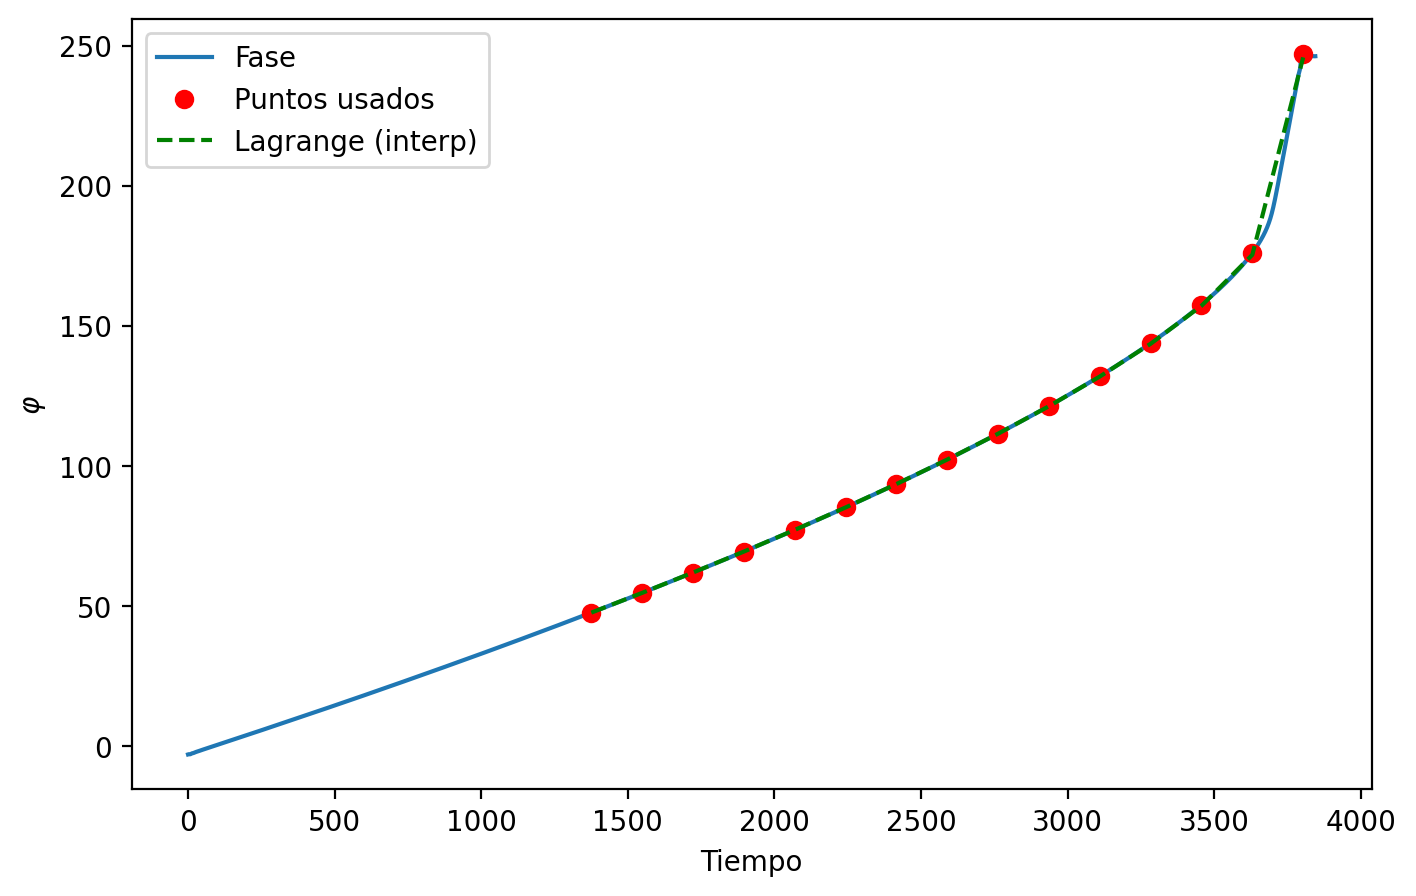

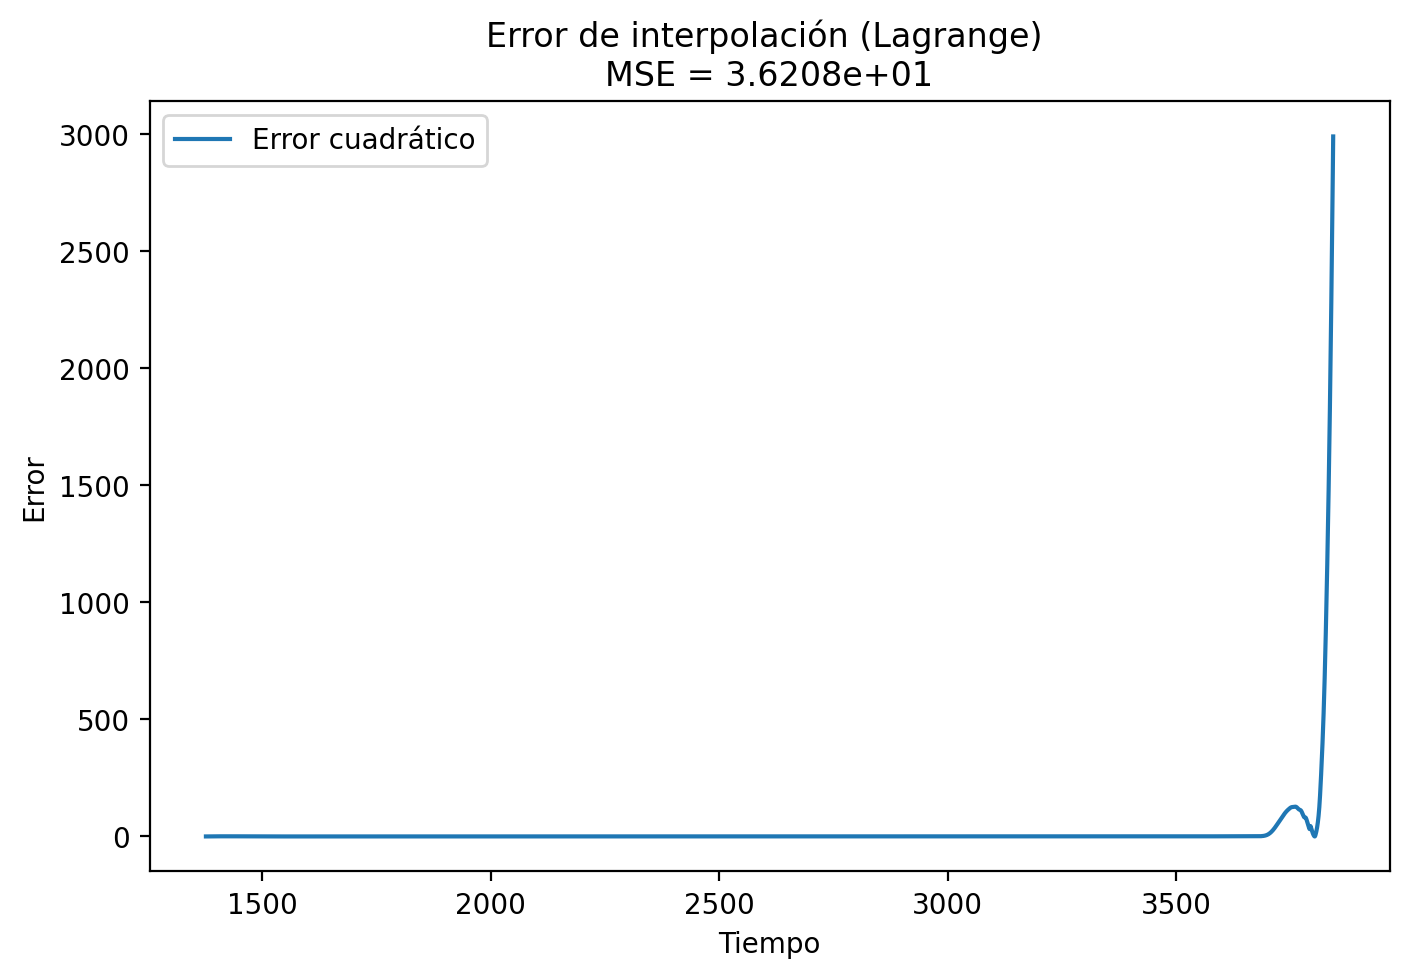

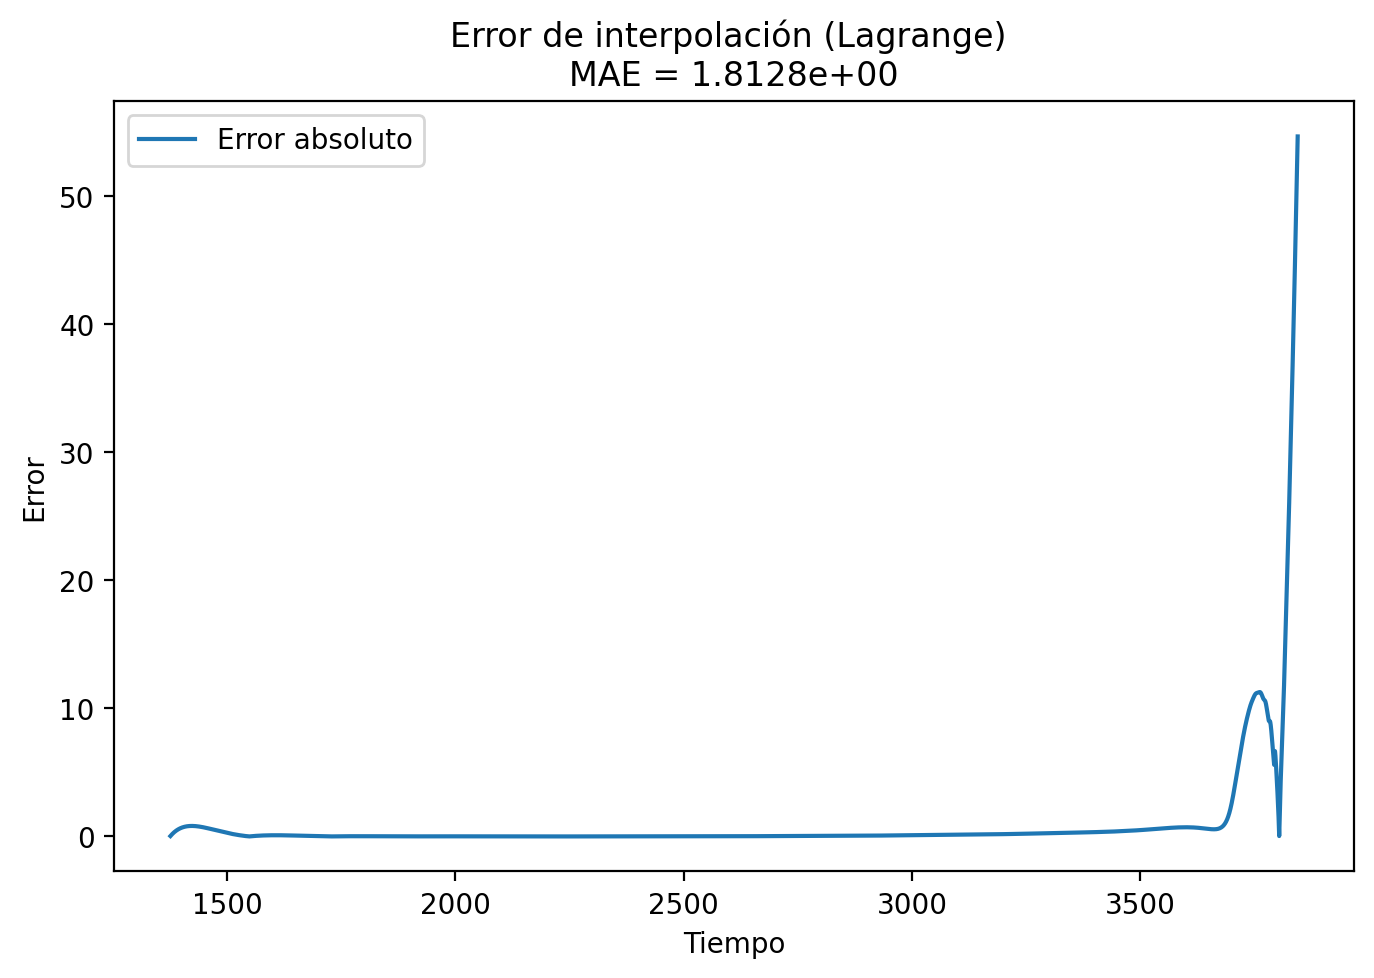

In [ ]:
# Lagrange

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange, CubicSpline, PchipInterpolator
from sklearn.metrics import mean_squared_error, mean_absolute_error

time= w.t
phi_unwrapped = np.unwrap(-phi)
# Asegurarse de que tengan misma longitud
assert len(phi_unwrapped == len(time))
#rango de la interpolacion
t0 = w.metadata.reference_time  # tiempo de referencia
t_min = np.argmin(np.abs(time - t0)) # índice más cercano a t0
i_max = np.argmax(np.abs(phi_unwrapped)) # índice de la fase máxima
#puntos de entrenamiento
N = 15
t = np.linspace(time[t_min], time[i_max], N) #indice de los elementos del grupo de entrenamiento
fase = np.interp(t, time, phi_unwrapped)
#puntos de prueba
t_test_full = time[time >= t0]
t_test = np.setdiff1d(t_test_full, t) #Quitar los tiempos de entrenamiento
fase_test = np.interp(t_test, time, phi_unwrapped)
# interpolación de Lagrange
polinomio_lagrange = lagrange(t, fase)
print("Polinomio de Lagrange:")
print(polinomio_lagrange)

# Graficar comparación
plt.figure(figsize=(8,5))
plt.plot(w_2_2.t, np.unwrap(-phi), label="Fase")
plt.plot(t, fase, 'ro', label="Puntos usados")
plt.plot(t, polinomio_lagrange(t), 'g--', label="Lagrange (interp)")
plt.ylabel(r'$\varphi$')
plt.xlabel("Tiempo")
plt.legend()
plt.show()

# Errores
fase_pred = polinomio_lagrange(t_test)
SE = (fase_test - fase_pred )**2
AE = np.abs(fase_test - fase_pred)
MSE = mean_squared_error(fase_test, fase_pred)
MAE = mean_absolute_error(fase_test, fase_pred)

plt.figure(figsize=(8,5))
plt.plot(t_test, SE, label="Error cuadrático")
plt.xlabel("Tiempo")
plt.ylabel("Error")
plt.title(f'Error de interpolación (Lagrange) \nMSE = {MSE:.4e}')
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.plot(t_test, AE, label="Error absoluto")
plt.xlabel("Tiempo")
plt.ylabel("Error")
plt.title(f'Error de interpolación (Lagrange) \nMAE = {MAE:.4e}')
plt.legend()

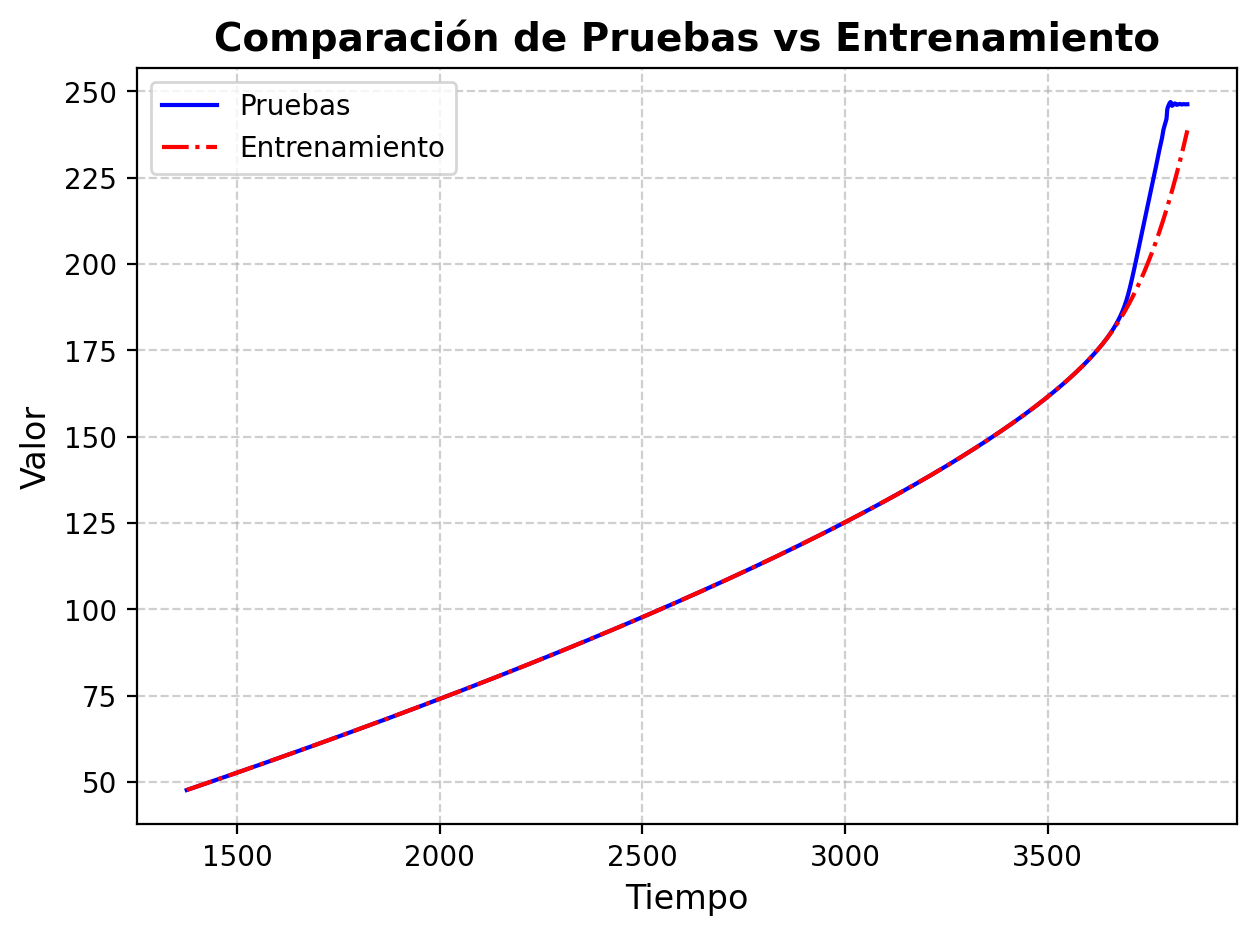

In [ ]:
#III comparacion de prueba y entrenamiento

t_p = w.t[w.t >= 1375.5]
y_p = phase[w.t >= 1375.5]

#Definimos el grupo de entrenamiento

t_entrenamiento = t_p[:int(len(t_p)*0.8)]
y_entrenamiento = y_p[:int(len(t_p)*0.8)]

#Ahora definimos el grupo de pruebas

t_pruebas = np.setdiff1d(t_p, t_entrenamiento)
y_pruebas = np.setdiff1d(y_p, y_entrenamiento)


spline_n = CubicSpline(t_entrenamiento,y_entrenamiento)
y_New = spline_n(t_p)

# Gráficas
plt.plot(t_p, y_p, '-', color='blue', label='Pruebas')
plt.plot(t_p, y_New, '-.', color='red', label='Entrenamiento')

# Decoración
plt.title("Comparación de Pruebas vs Entrenamiento", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

# Mostrar
plt.tight_layout()
plt.show()

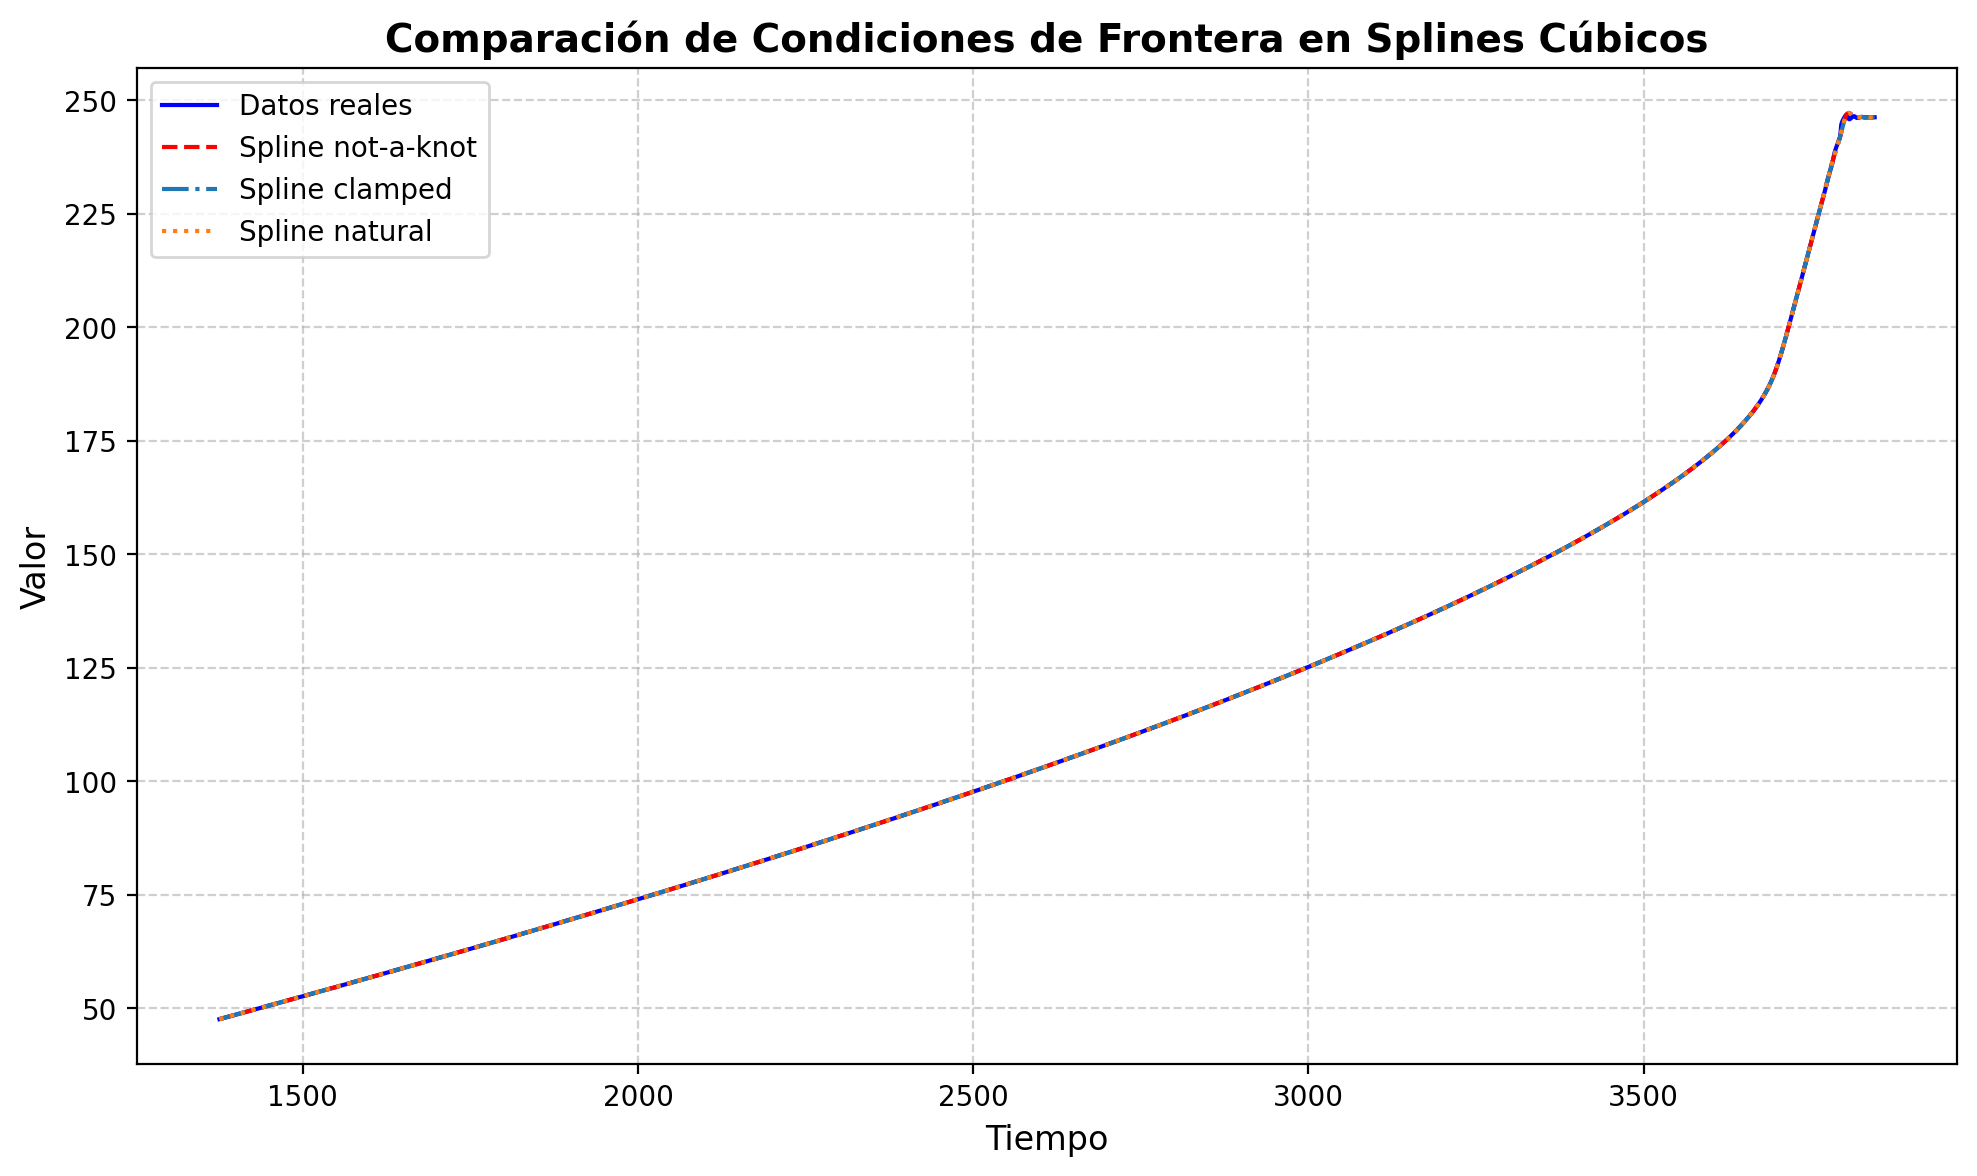

In [ ]:
# III Spline
t_p = w.t[w.t >= 1375.5]
y_p = phase[w.t >= 1375.5]


# Definimos el grupo de entrenamiento
t_entrenamiento = t_p[1::100]
y_entrenamiento = y_p[1::100]

# Ahora definimos el grupo de pruebas

t_pruebas = np.setdiff1d(t_p, t_entrenamiento)
y_pruebas = np.setdiff1d(y_p, y_entrenamiento)


# Condiciones de Frontera

# 1) Condición "not-a-knot" (por defecto)

spline_notaknot = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type='not-a-knot')
y_notaknot = spline_notaknot(t_p)

# 2) Condición "clamped" (especificando la derivada en los extremos)
#   Aquí se supone que conoces o aproximas la pendiente en los extremos
dy0 = abs((y_entrenamiento[1] - y_entrenamiento[0]) / (t_entrenamiento[1] - t_entrenamiento[0]))
dyN = abs((y_entrenamiento[-1] - y_entrenamiento[-2]) / (t_entrenamiento[-1] - t_entrenamiento[-2]))
spline_clamped = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type=((1, dy0), (1, dyN)))
y_clamped = spline_clamped(t_p)

# 3) Condición "natural" (segunda derivada nula en extremos)
spline_natural = CubicSpline(t_entrenamiento, y_entrenamiento, bc_type='natural')
y_natural = spline_natural(t_p)

# Gráficas
plt.figure(figsize=(10,6))
plt.plot(t_p, y_p, '-', color='blue', label='Datos reales')
plt.plot(t_p, y_notaknot, '--',color='red', label='Spline not-a-knot')
plt.plot(t_p, y_clamped, '-.', label='Spline clamped')
plt.plot(t_p, y_natural, ':', label='Spline natural')


# Decoración
plt.title("Comparación de Condiciones de Frontera en Splines Cúbicos", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

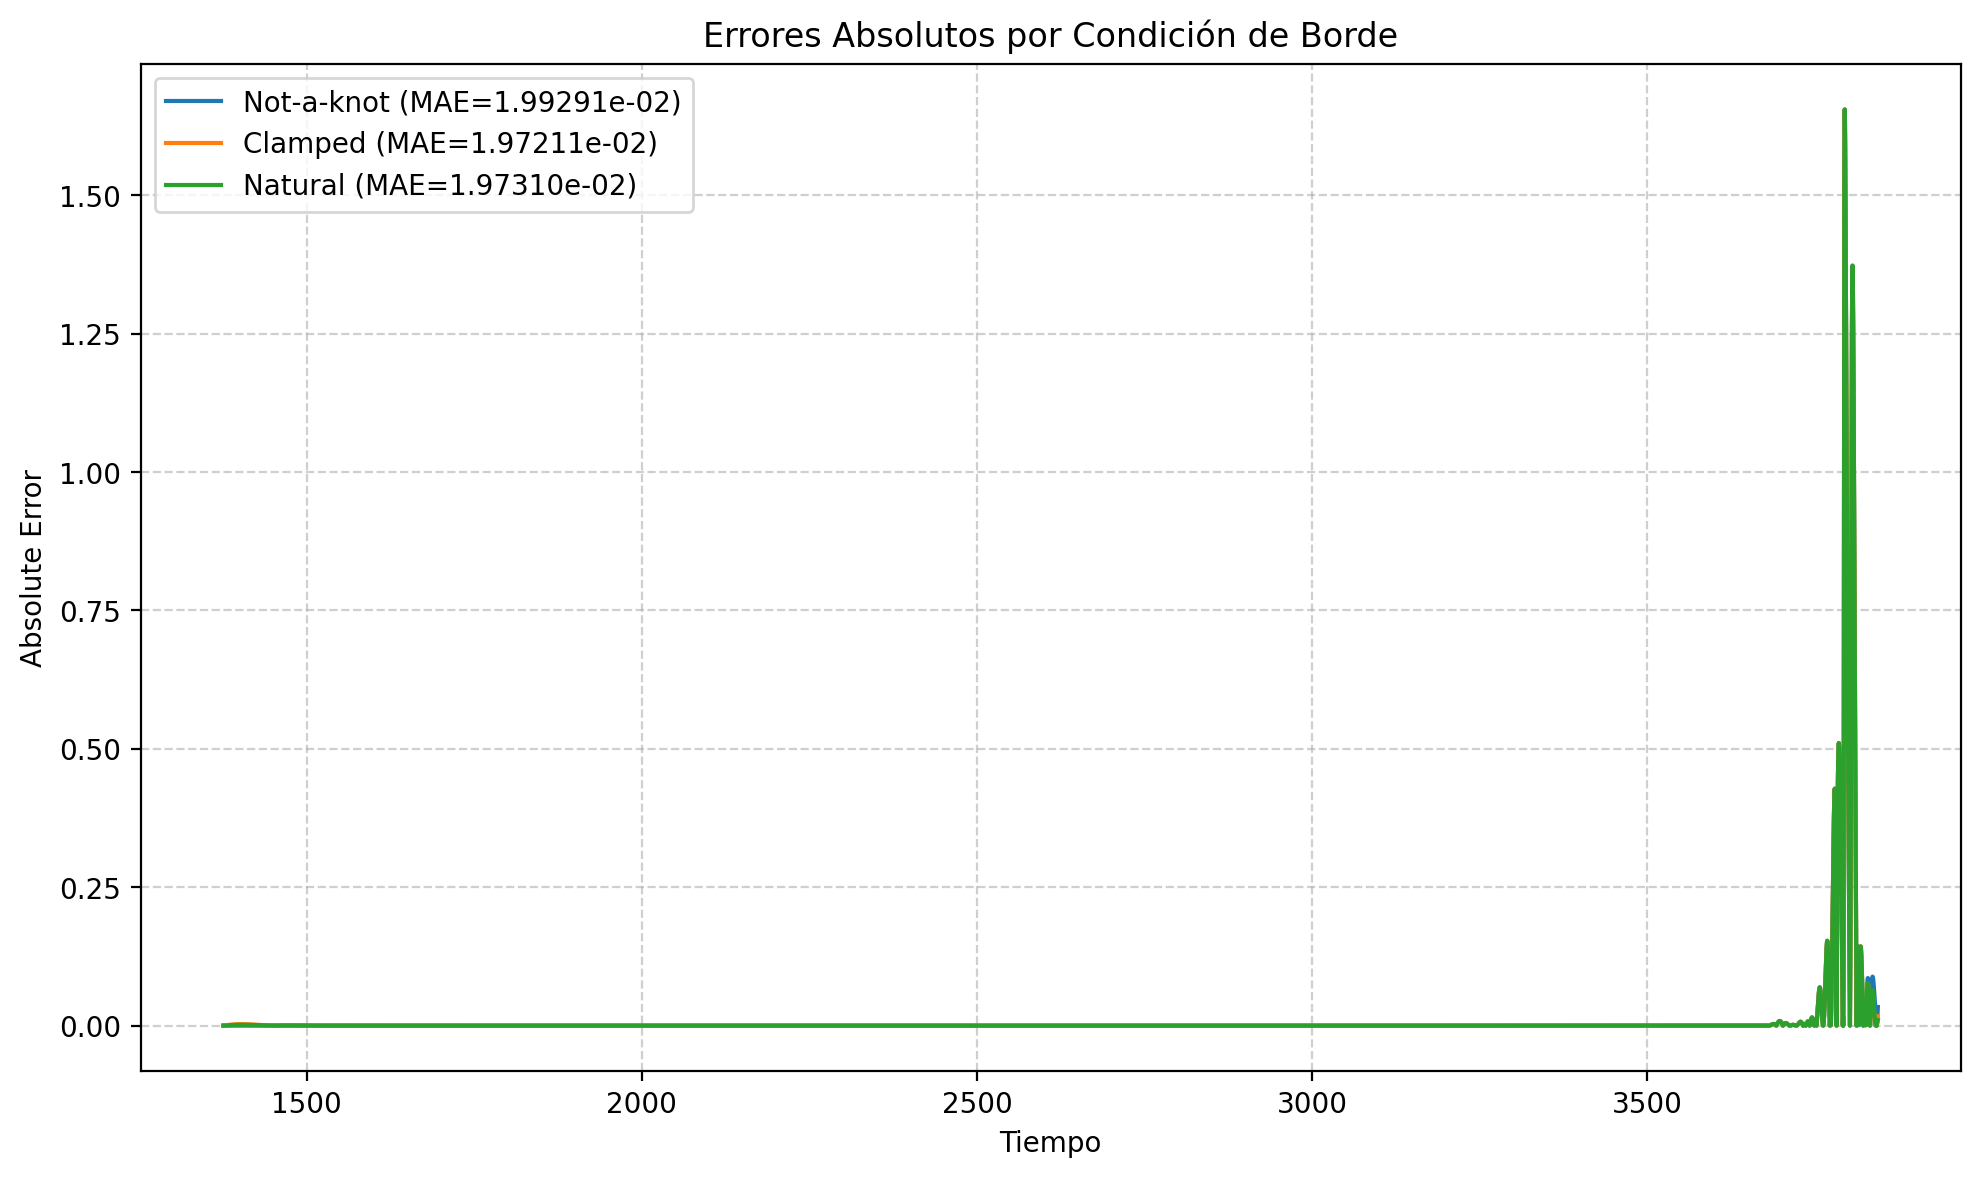

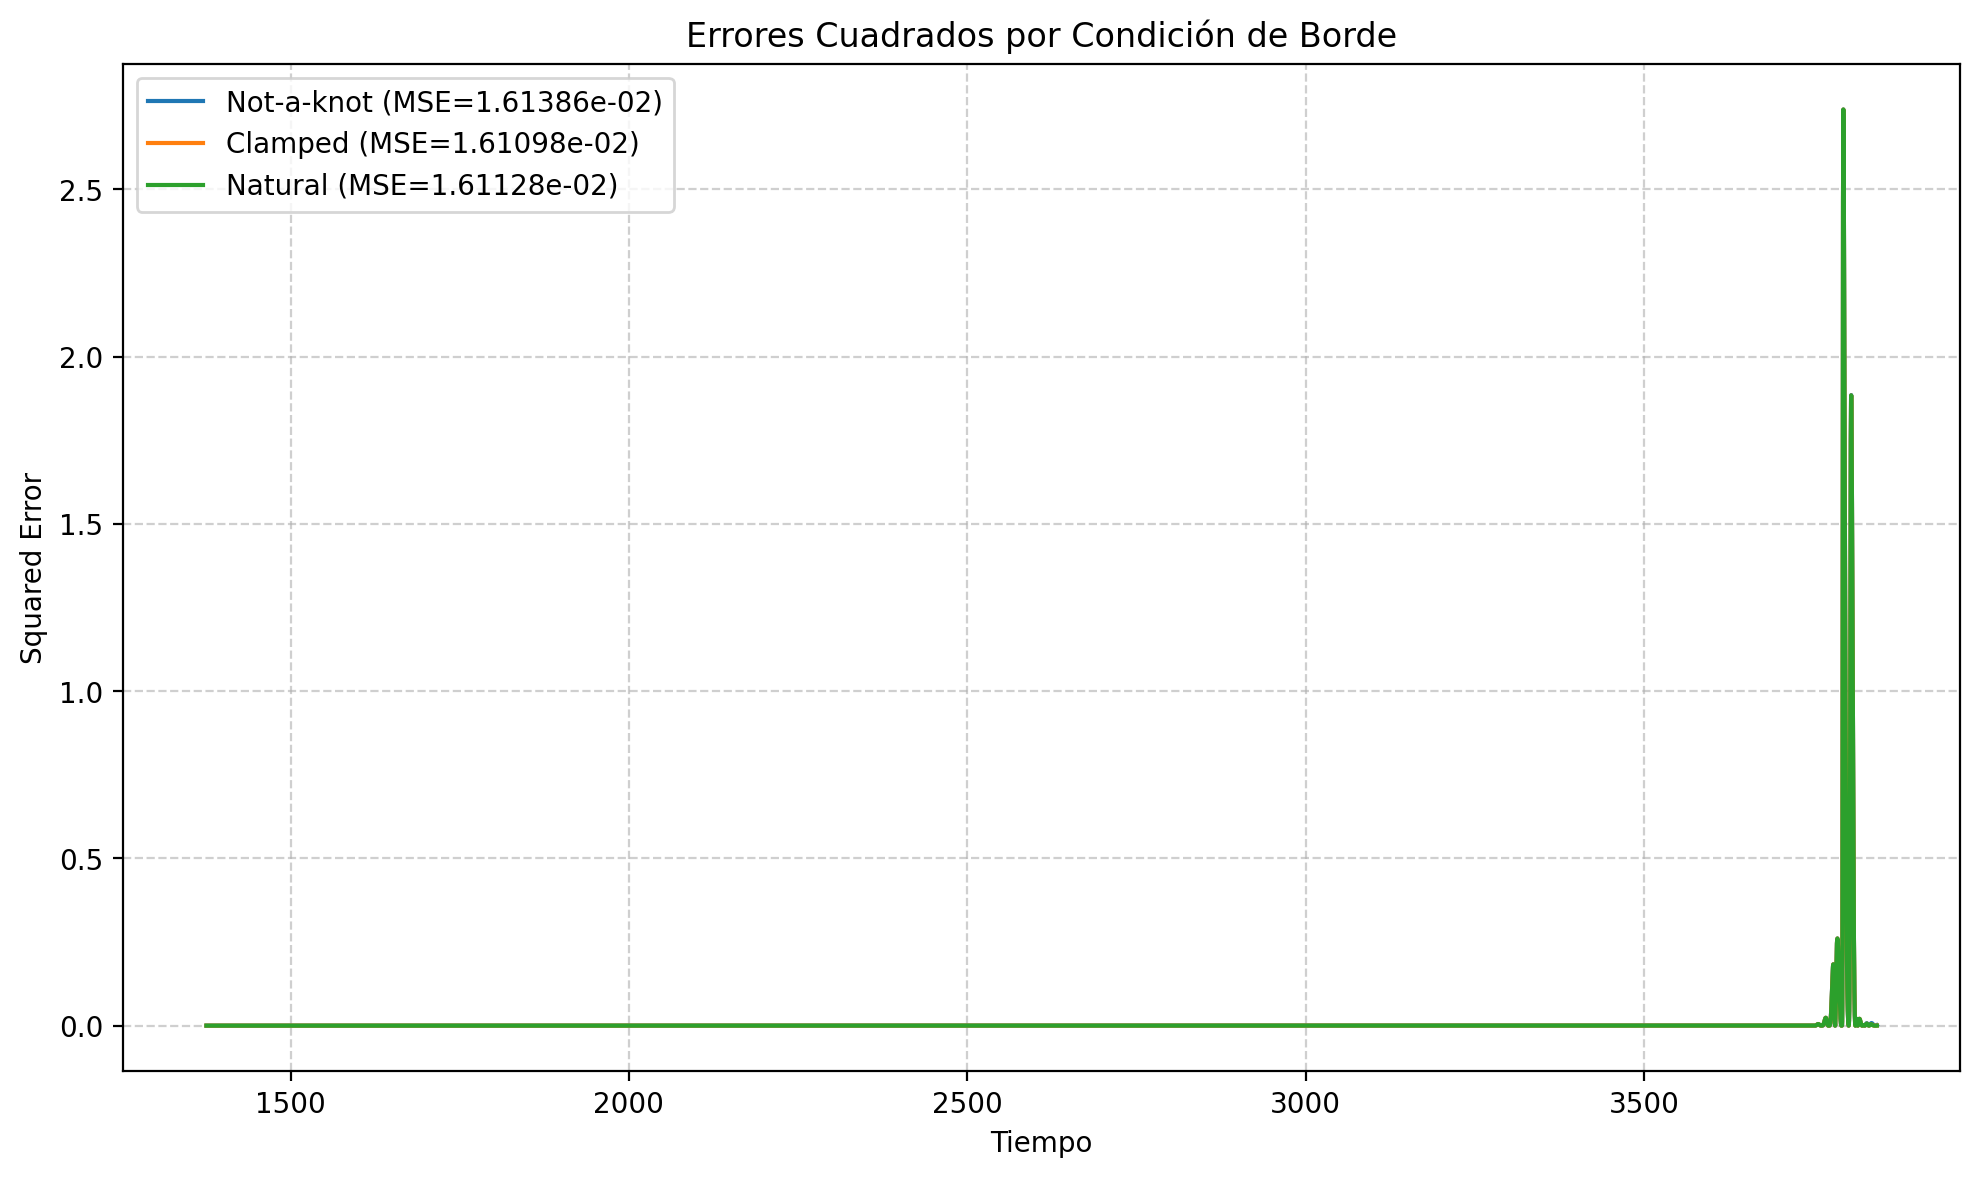

In [ ]:
#grafica de error los spline

# asegurar que los arreglos tengan el mismo tamaño
min_len = min(len(y_p), len(y_notaknot), len(y_clamped), len(y_natural))

y_p_clipped = y_p[:min_len]
y_notaknot_clipped = y_notaknot[:min_len]
y_clamped_clipped = y_clamped[:min_len]
y_natural_clipped = y_natural[:min_len]
t_p_clipped = t_p[:min_len]


# Diccionario de errores
errors = {
    "Not-a-knot": {
        "abs": np.abs(y_p_clipped - y_notaknot_clipped),
        "sq": (y_p_clipped - y_notaknot_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_notaknot_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_notaknot_clipped)
    },
    "Clamped": {
        "abs": np.abs(y_p_clipped - y_clamped_clipped),
        "sq": (y_p_clipped - y_clamped_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_clamped_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_clamped_clipped)
    },
    "Natural": {
        "abs": np.abs(y_p_clipped - y_natural_clipped),
        "sq": (y_p_clipped - y_natural_clipped) ** 2,
        "MAE": mean_absolute_error(y_p_clipped, y_natural_clipped),
        "MSE": mean_squared_error(y_p_clipped, y_natural_clipped)
    }
}

# --- Gráfica de errores absolutos ---
plt.figure(figsize=(10,6))
for name, e in errors.items():
    plt.plot(t_p_clipped, e["abs"], label=f"{name} (MAE={e['MAE']:.5e})")
plt.title("Errores Absolutos por Condición de Borde")
plt.xlabel("Tiempo")
plt.ylabel("Absolute Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

# --- Gráfica de errores cuadrados ---
plt.figure(figsize=(10,6))
for name, e in errors.items():
    plt.plot(t_p_clipped, e["sq"], label=f"{name} (MSE={e['MSE']:.5e})")
plt.title("Errores Cuadrados por Condición de Borde")
plt.xlabel("Tiempo")
plt.ylabel("Squared Error")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

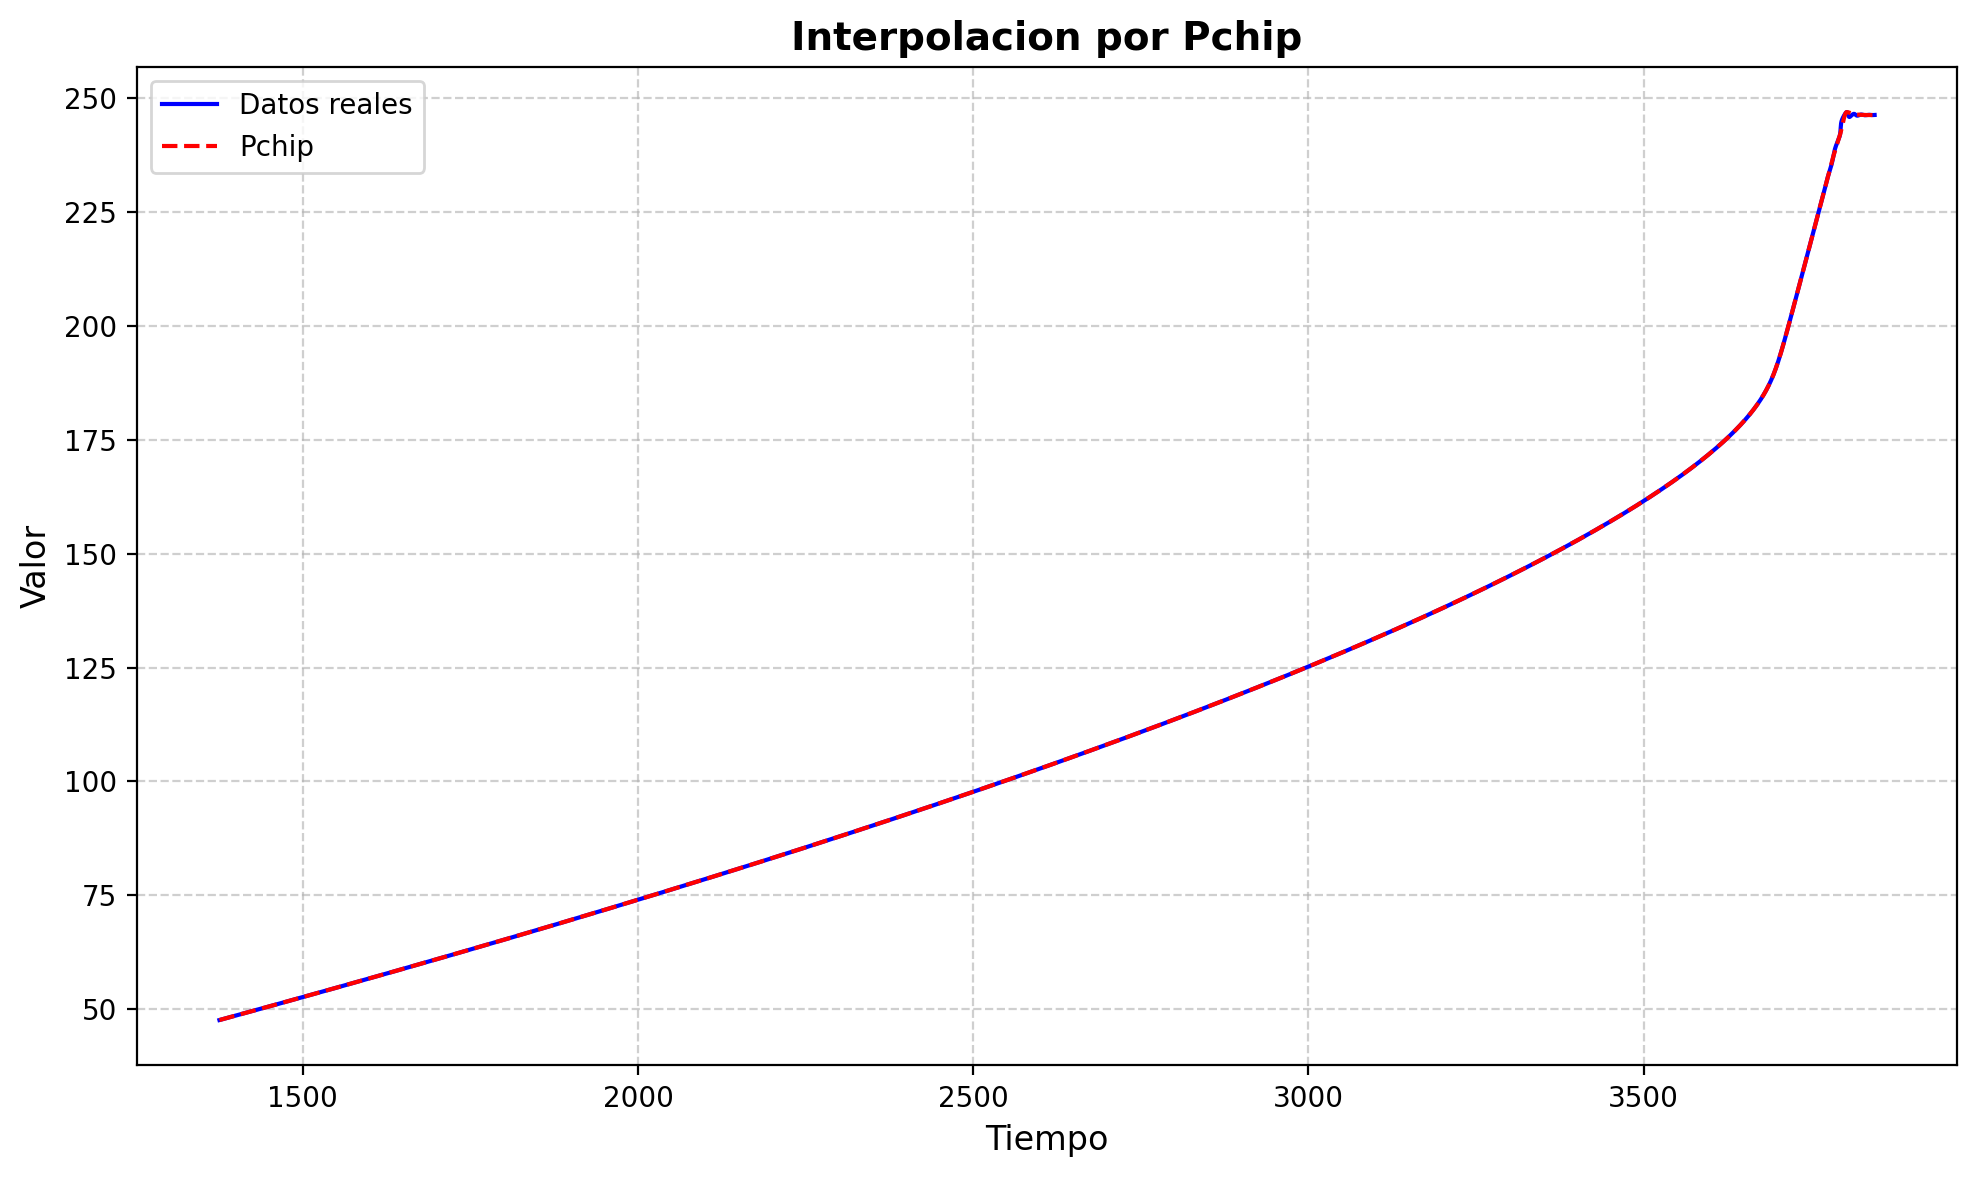

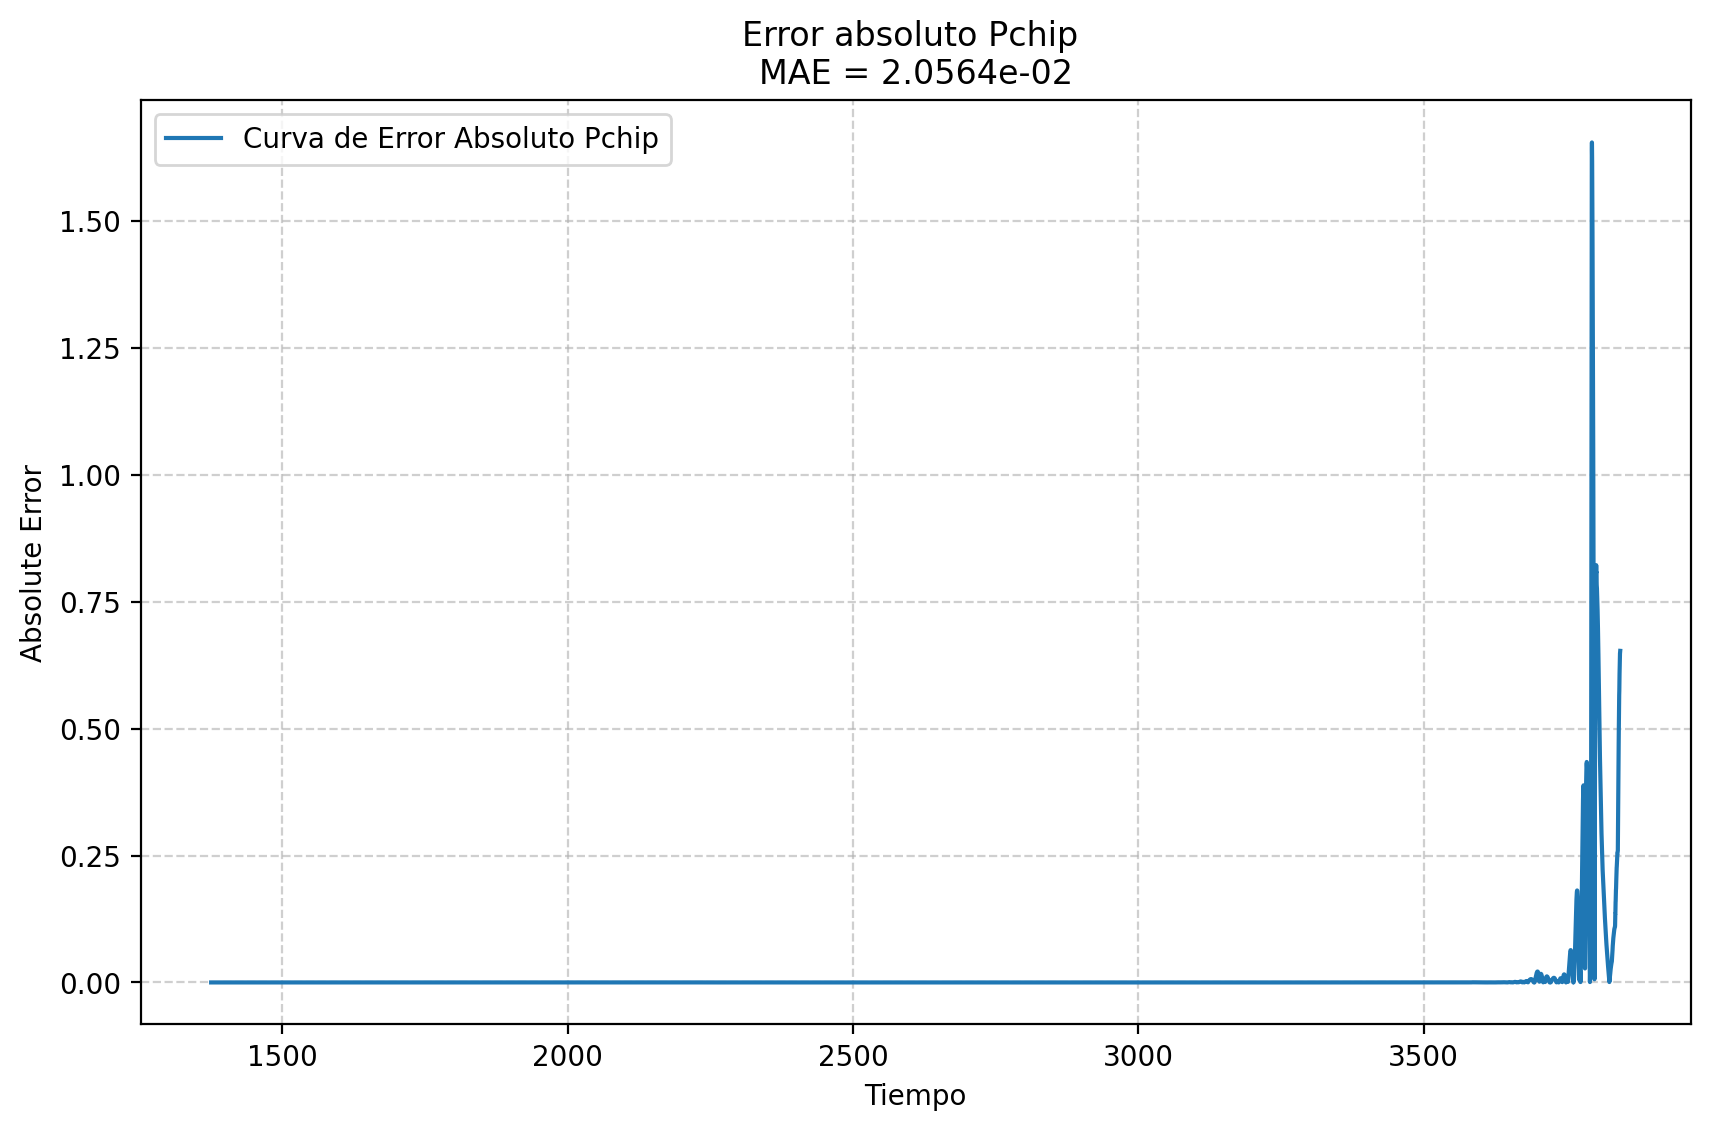

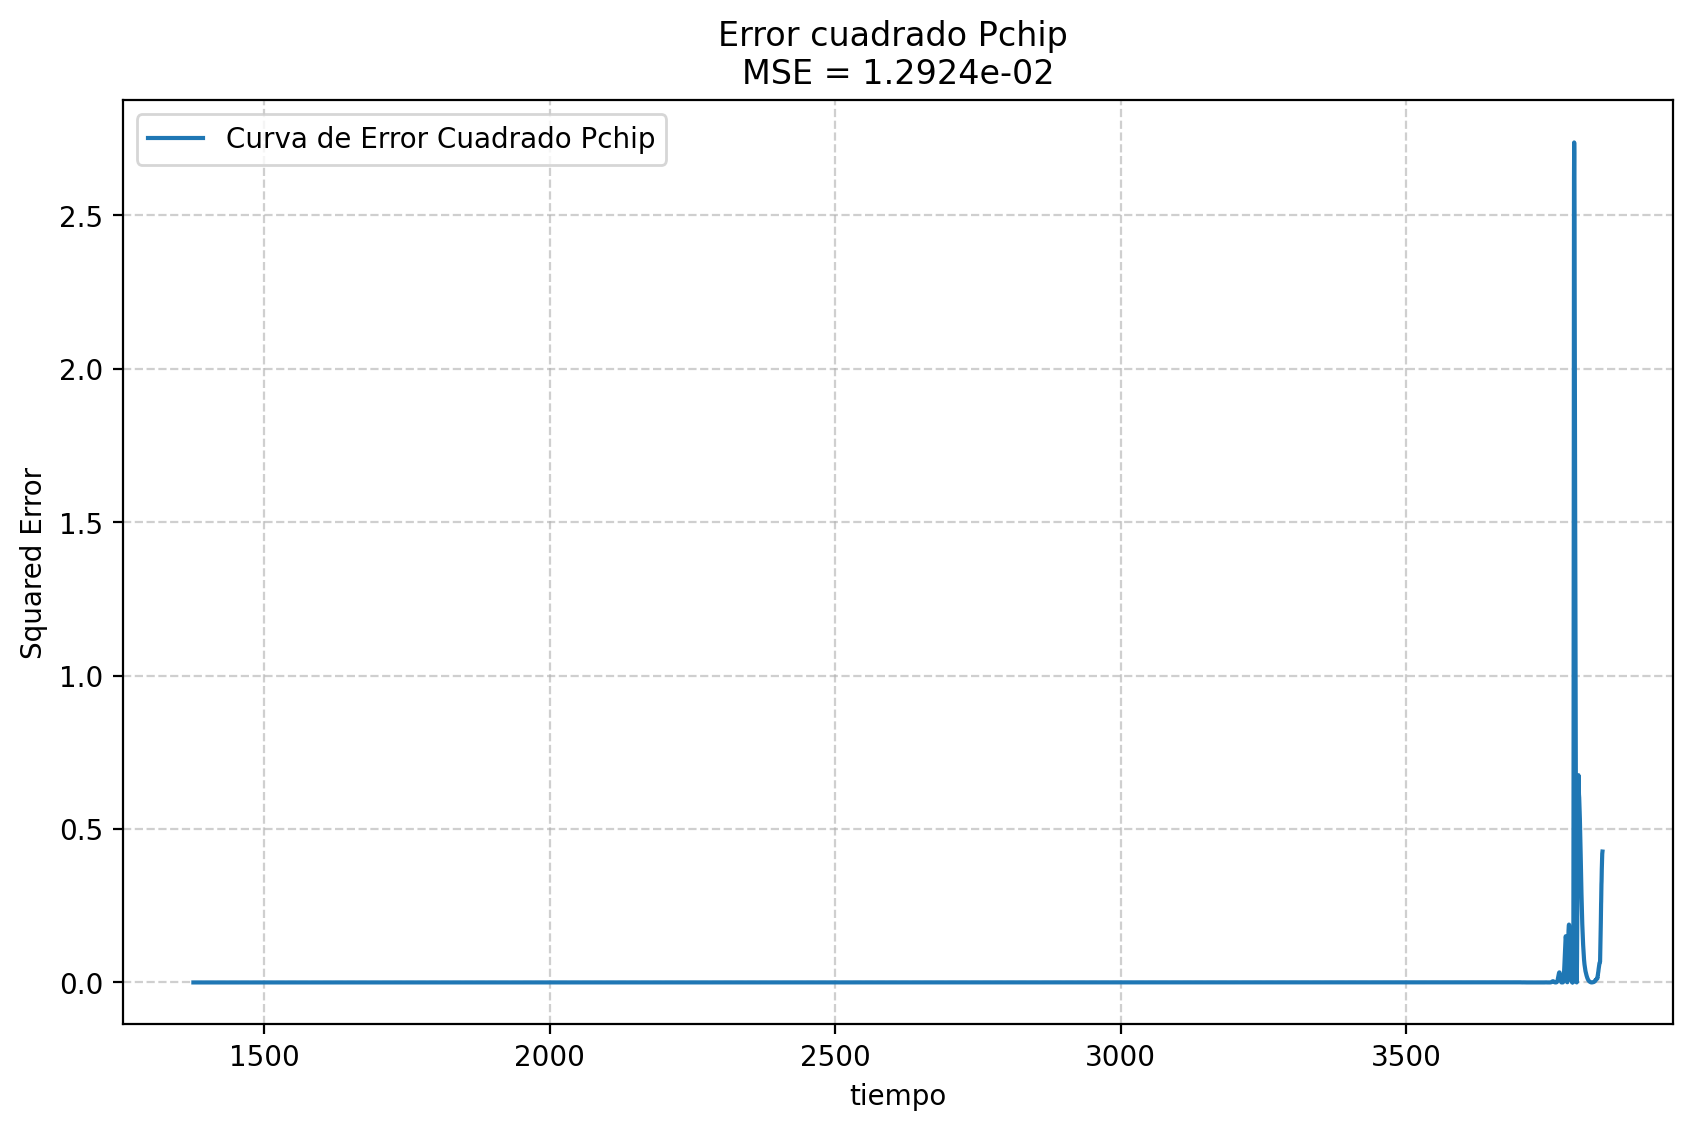

In [ ]:
# interpolacion Pchip

pchip = PchipInterpolator(t_entrenamiento, y_entrenamiento)
y_pchip = pchip(t_p)

plt.figure(figsize=(10,6))
plt.plot(t_p, y_p, '-', color='blue', label='Datos reales')
plt.plot(t_p, y_pchip, '--',color='red', label='Pchip')

# Decoración
plt.title("Interpolacion por Pchip", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Valor", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#error Pchip

absolute_error_pchip = mean_absolute_error(y_pruebas,pchip(t_pruebas))
quared_error_pchip = mean_squared_error(y_pruebas,pchip(t_pruebas))

MAE_pchip = np.abs(y_pruebas - pchip(t_pruebas))
MSE_pchip = (y_pruebas - pchip(t_pruebas))**2

plt.figure(figsize=(10,6))
plt.plot(t_pruebas, MAE_pchip, label="Curva de Error Absoluto Pchip")
plt.xlabel('Tiempo')
plt.ylabel('Absolute Error')
plt.title(f'Error absoluto Pchip \nMAE = {absolute_error_pchip:.4e}')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.plot(t_pruebas, MSE_pchip, label="Curva de Error Cuadrado Pchip")
plt.xlabel('tiempo')
plt.ylabel('Squared Error')
plt.title(f'Error cuadrado Pchip \nMSE = {quared_error_pchip:.4e}')
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()


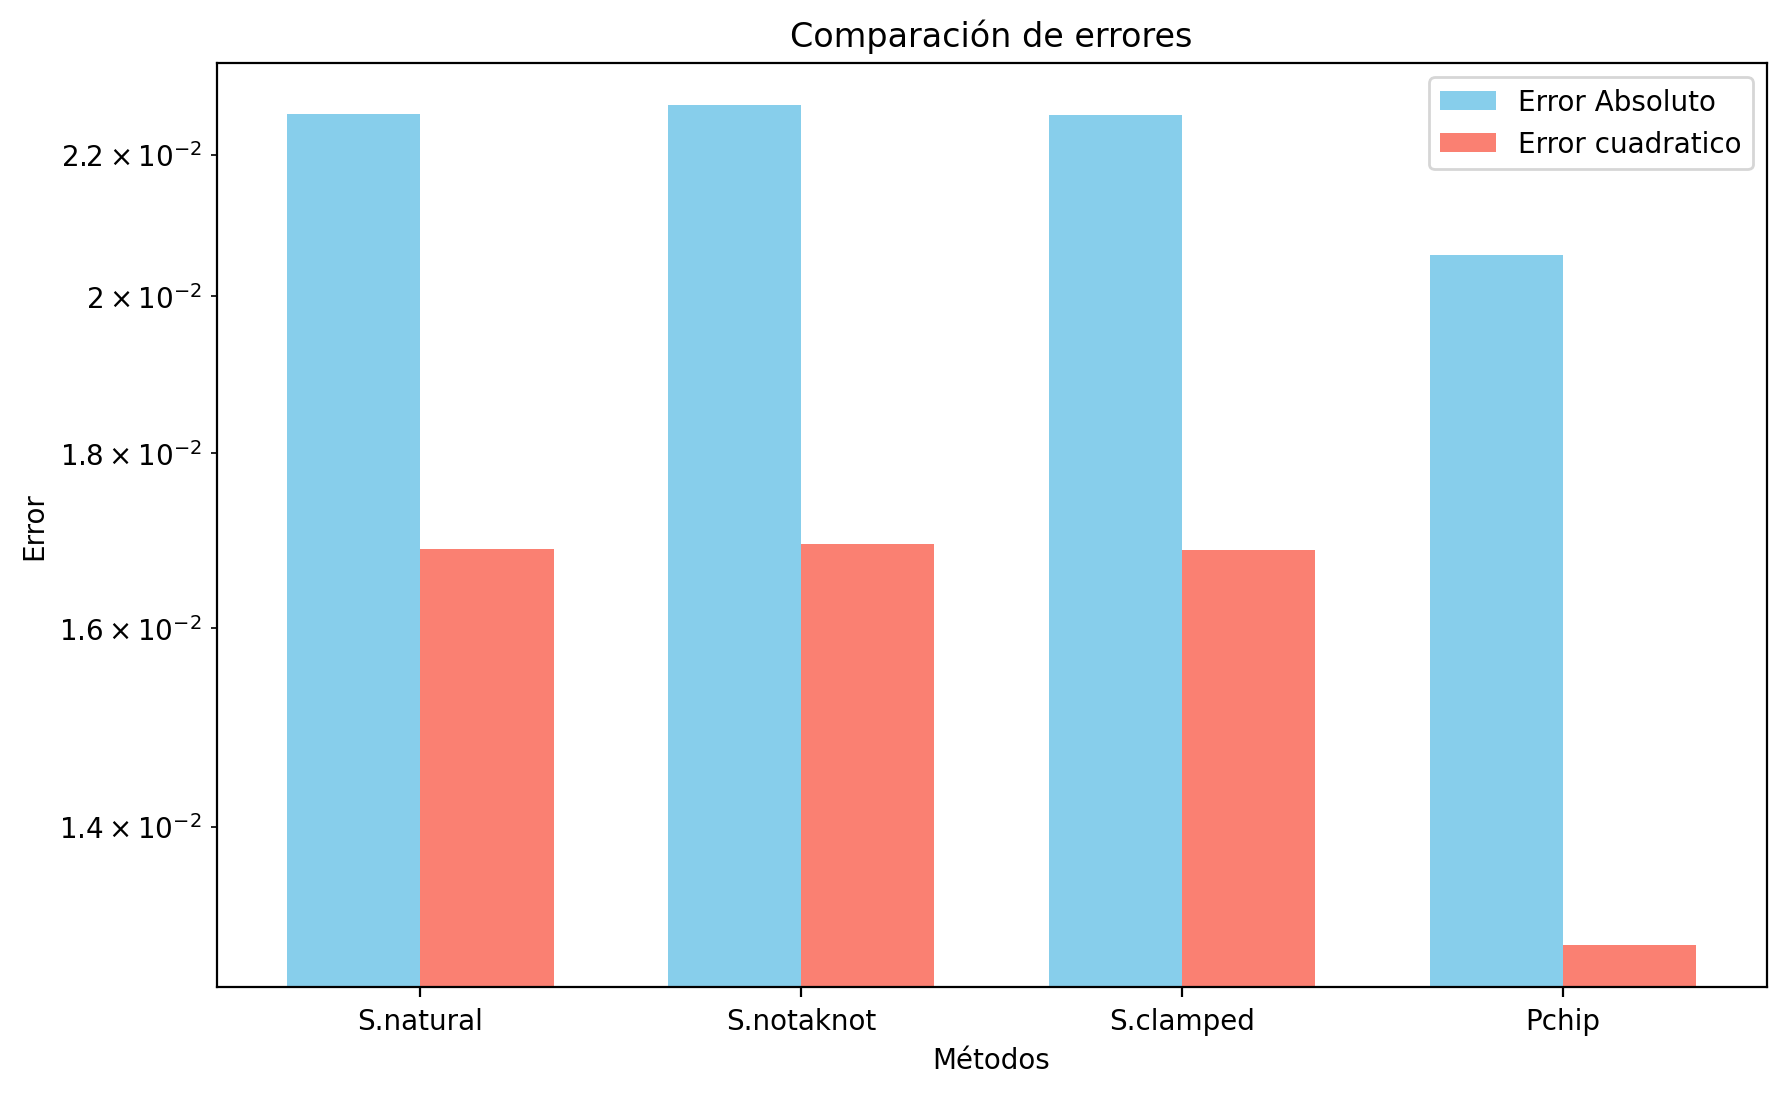

In [ ]:
#GRAFICA DE COMPARACION DE ERRORES

Interpolaciones = ['S.natural','S.notaknot', 'S.clamped','Pchip']

#errores abs
absolute_error_natural=mean_absolute_error(y_pruebas,spline_natural(t_pruebas))
absolute_error_notaknot=mean_absolute_error(y_pruebas,spline_notaknot(t_pruebas))
absolute_error_clamped=mean_absolute_error(y_pruebas,spline_clamped(t_pruebas))
absolute_error_pchip=mean_absolute_error(y_pruebas,pchip(t_pruebas))

#errores Cuad
squared_error_natural=mean_squared_error(y_pruebas,spline_natural(t_pruebas))
squared_error_notaknot=mean_squared_error(y_pruebas,spline_notaknot(t_pruebas))
squared_error_clamped=mean_squared_error(y_pruebas,spline_clamped(t_pruebas))
squared_error_pchip=mean_squared_error(y_pruebas,pchip(t_pruebas))

errores_abs = [absolute_error_natural,absolute_error_notaknot,absolute_error_clamped,absolute_error_pchip]
errores_cuad = [squared_error_natural,squared_error_notaknot,squared_error_clamped,squared_error_pchip]

plt.figure(figsize=(10,6))

# Posición de las barras
x = np.arange(len(Interpolaciones))
ancho = 0.35  # ancho de cada barra

plt.bar(x - ancho/2, errores_abs, width=ancho, label="Error Absoluto", color="skyblue")
plt.bar(x + ancho/2, errores_cuad, width=ancho, label="Error cuadratico", color="salmon")

# Etiquetas
plt.yscale('log')
plt.xticks(x, Interpolaciones)
plt.xlabel("Métodos")
plt.ylabel("Error")
plt.title("Comparación de errores")
plt.legend()

plt.show()

# Segundo parcial

In [ ]:
#primera parte
#obtener la parte creciente de los datos

t_x = np.zeros(len(t_p)-1)
y_x = np.zeros(len(t_p)-1)

for i in range(0,len(y_p)-1):

  if y_p[i+1] - y_p[i] > 0 :
   t_x[i]= t_p[i]
   y_x[i]= y_p[i]

  else:
    break

t_x = t_x[t_x != 0]
y_x = y_x[y_x != 0]

In [ ]:
#constantes

M =(meta['initial_mass1']+meta['initial_mass2'])*1.988*(10**30)
C = 1/(2*np.pi)
geo_hz=(const.c**3)/(const.G*M) #pasar de 1/M a unidades fisicas

#interpolacion con pchip

pchip = PchipInterpolator(t_x,y_x)
pchip_der = pchip.derivative()

#-----derivadas para hallar la frecuencia-----

def derivada (n) :

  t_lin = np.linspace(t_x[0], t_x[-1], n)
  y_lin = pchip(t_lin)
  h = t_lin[1]-t_lin[0]
  print(f'h = {h}')
  print()
  #grafica de la interpolacion

  plt.figure(figsize=(10,6))
  plt.plot(t_x,y_x, '-',color='black', label='datos reales')
  plt.plot(t_lin,y_lin, '-.',color='C3', label='Pchip')
  plt.title(f"Interpolacion por Pchip con N:{n}", fontsize=14, fontweight='bold')
  plt.xlabel("Tiempo[t/M]", fontsize=12)
  plt.ylabel("Fase", fontsize=12)
  plt.legend()
  plt.show()
  print()

  #pchip
  fre_pchip = geo_hz*C*pchip_der(t_lin)

  #forward
  fre_forward = geo_hz*C*((y_lin[1:]-y_lin[:-1])/h)

  #backward
  fre_backward = geo_hz*C*((y_lin[1:]-y_lin[:-1])/h)

  #central
  fre_central = geo_hz*C*((y_lin[2:]-y_lin[:-2])/(2*h))


  plt.figure(figsize=(10,6))
  plt.plot(t_lin[:-1], fre_forward, '-', color='blue', label='forward')
  plt.plot(t_lin[1:],fre_backward, '--',color='red', label='Backward')
  plt.plot(t_lin[1:-1],fre_central, '--',color='green', label='Centrada')
  plt.plot(t_lin,fre_pchip, '--',color='yellow', label='Pchip')
  plt.title("Frecuencia vs Tiempo", fontsize=14, fontweight='bold')
  plt.xlabel("Tiempo [t/M]", fontsize=12)
  plt.ylabel("Frecuencia [Hz]", fontsize=12)
  plt.legend()
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()
  print()

  #------errores-----

  er_for_array= np.abs(fre_forward-fre_pchip[:-1])
  er_back_array = np.abs(fre_backward-fre_pchip[1:])
  er_central_array= np.abs(fre_central-fre_pchip[1:-1])

  error_forward = mean_absolute_error(fre_forward,fre_pchip[:-1])
  error_backward = mean_absolute_error(fre_backward,fre_pchip[1:])
  error_central = mean_absolute_error(fre_central,fre_pchip[1:-1])

  return er_for_array, er_back_array, er_central_array, error_forward, error_backward, error_central, t_lin


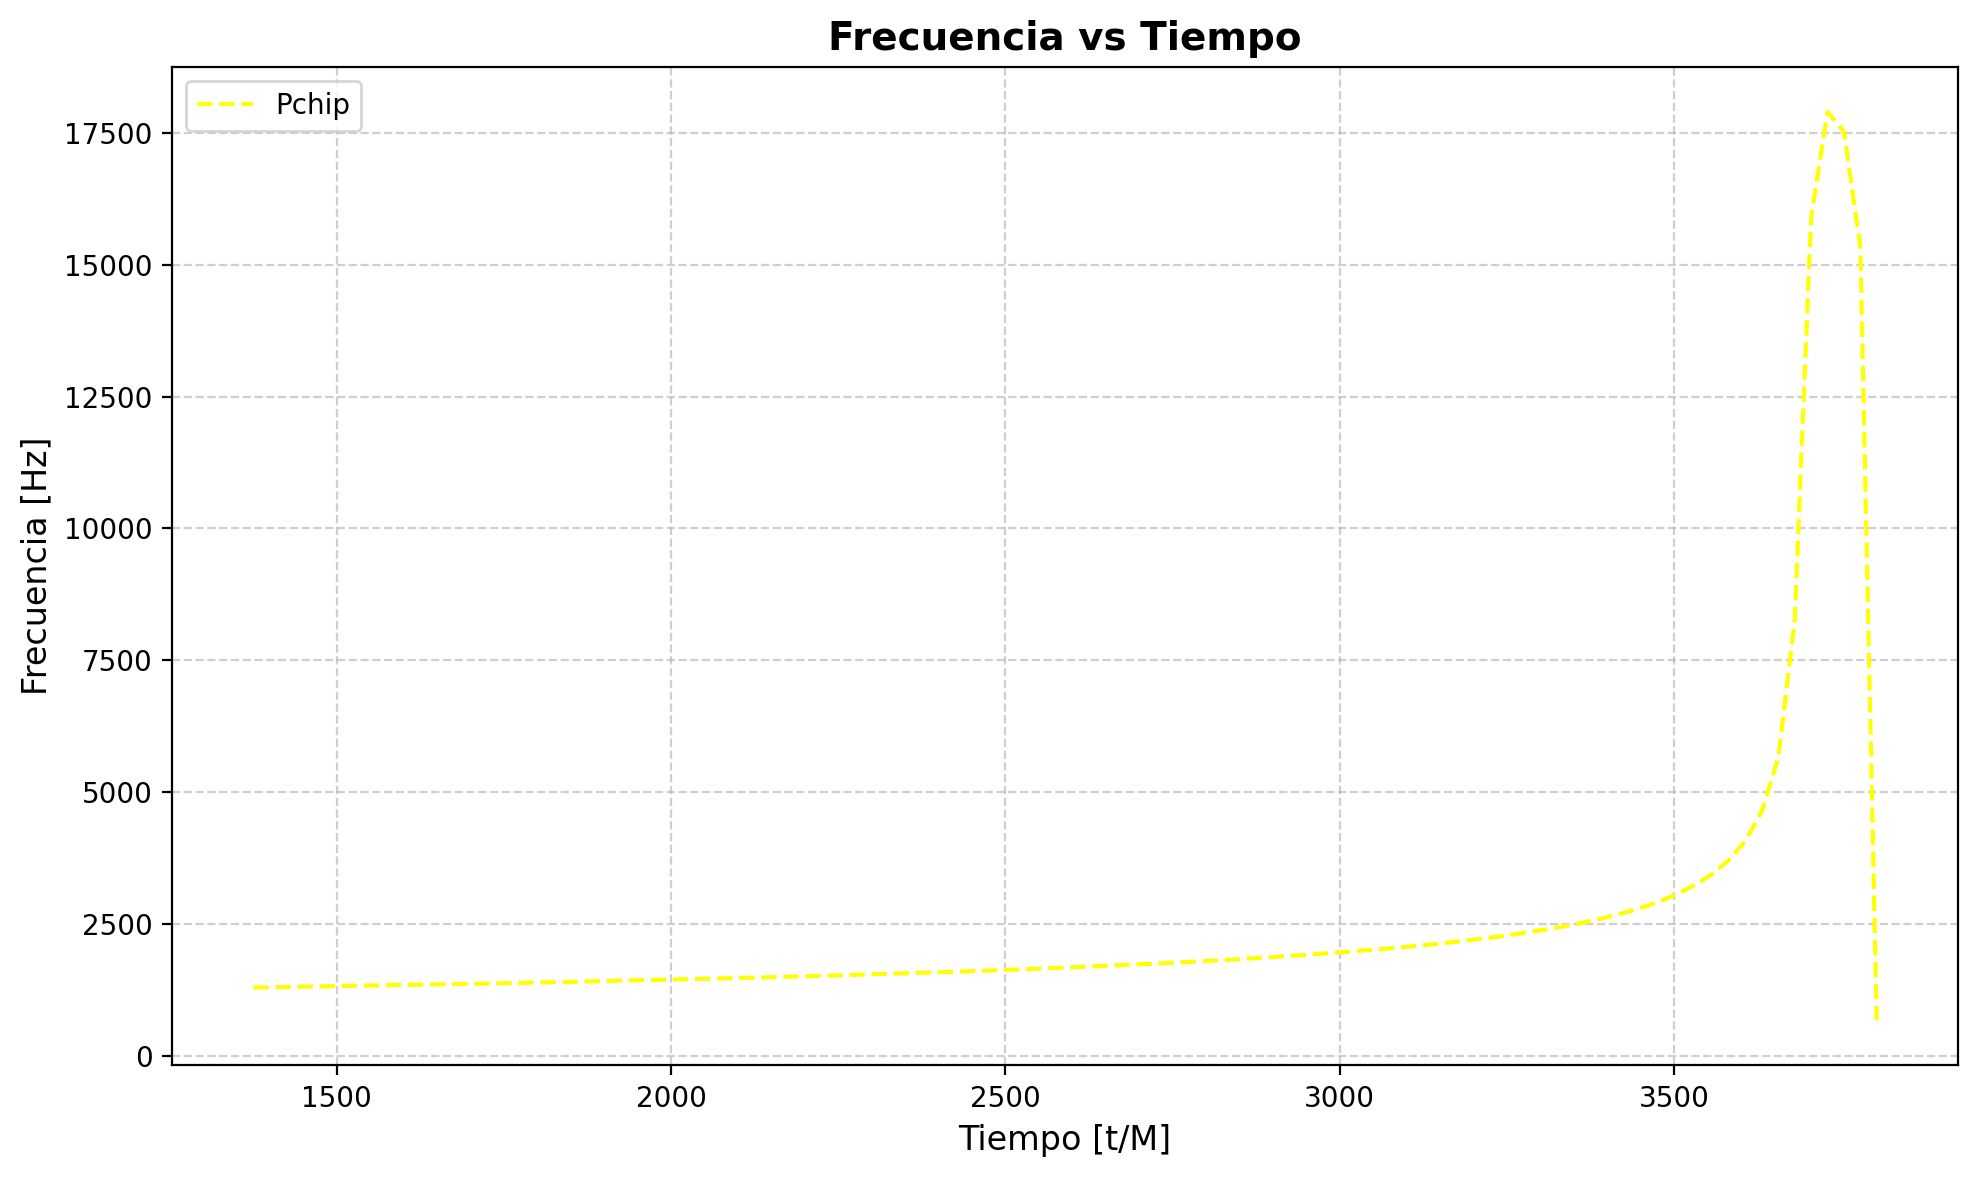

In [ ]:
print(pchip_der)

# Define t_lin and calculate fre_pchip before plotting
n_plot = 100 # Using a representative number of points for plotting
t_lin = np.linspace(t_x[0], t_x[-1], n_plot)
fre_pchip = geo_hz * C * pchip_der(t_lin)

plt.figure(figsize=(10,6))
plt.plot(t_lin,fre_pchip, '--',color='yellow', label='Pchip')
plt.title("Frecuencia vs Tiempo", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo [t/M]", fontsize=12)
plt.ylabel("Frecuencia [Hz]", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
print()

Numero de pasos :100
h = 24.518515968738257



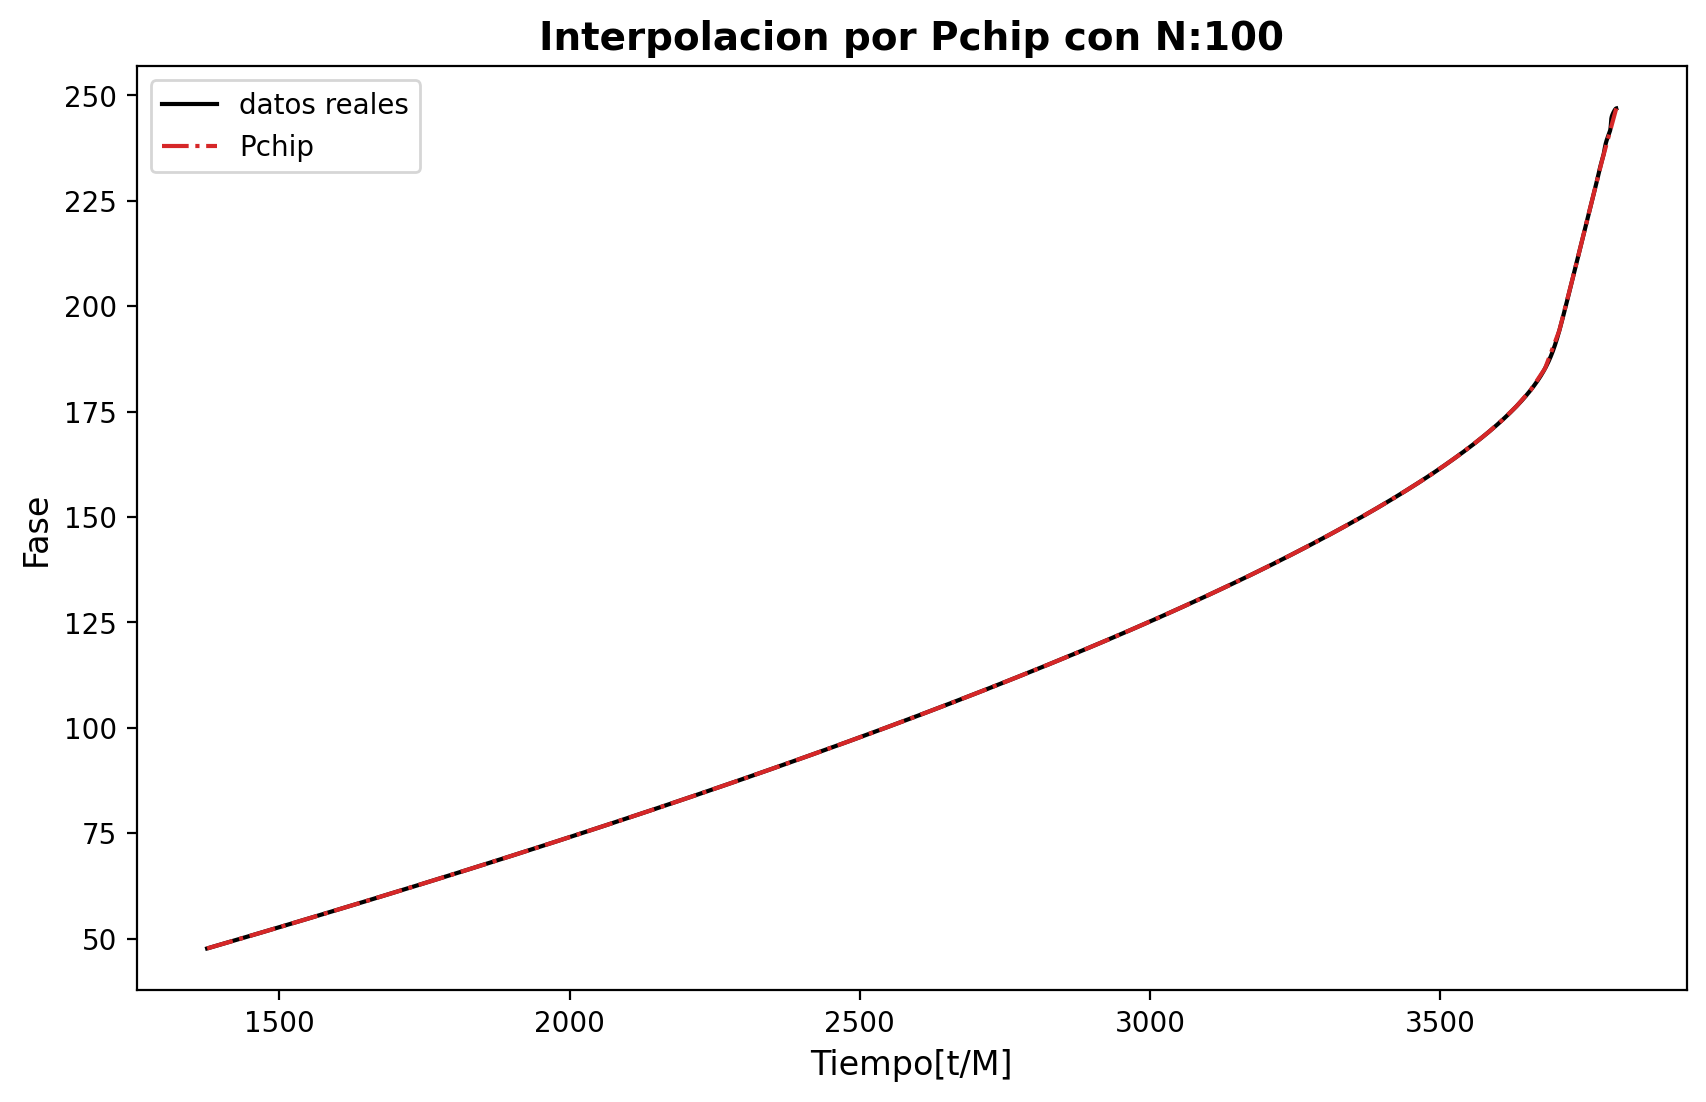

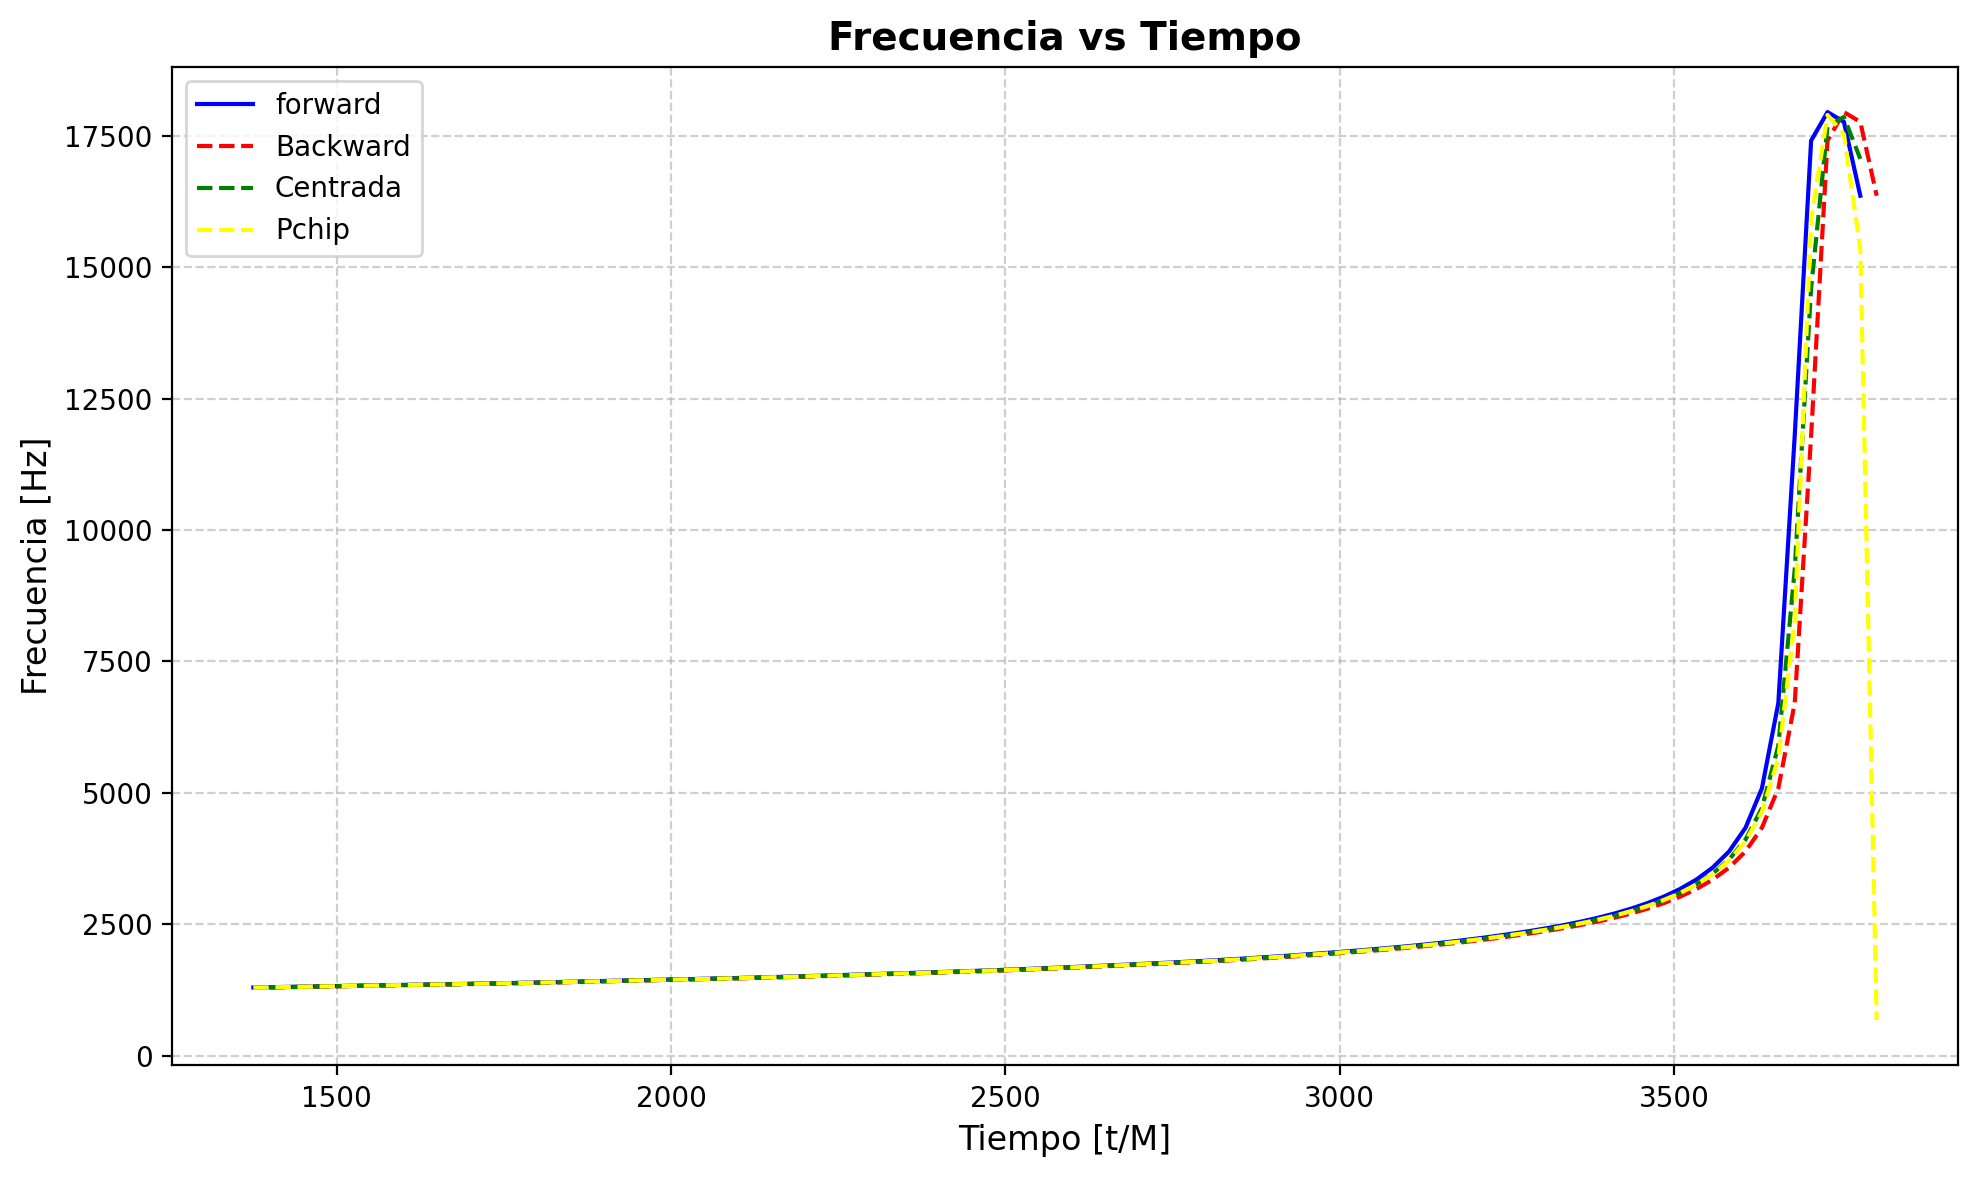


Numero de pasos :200
h = 12.197653672889828



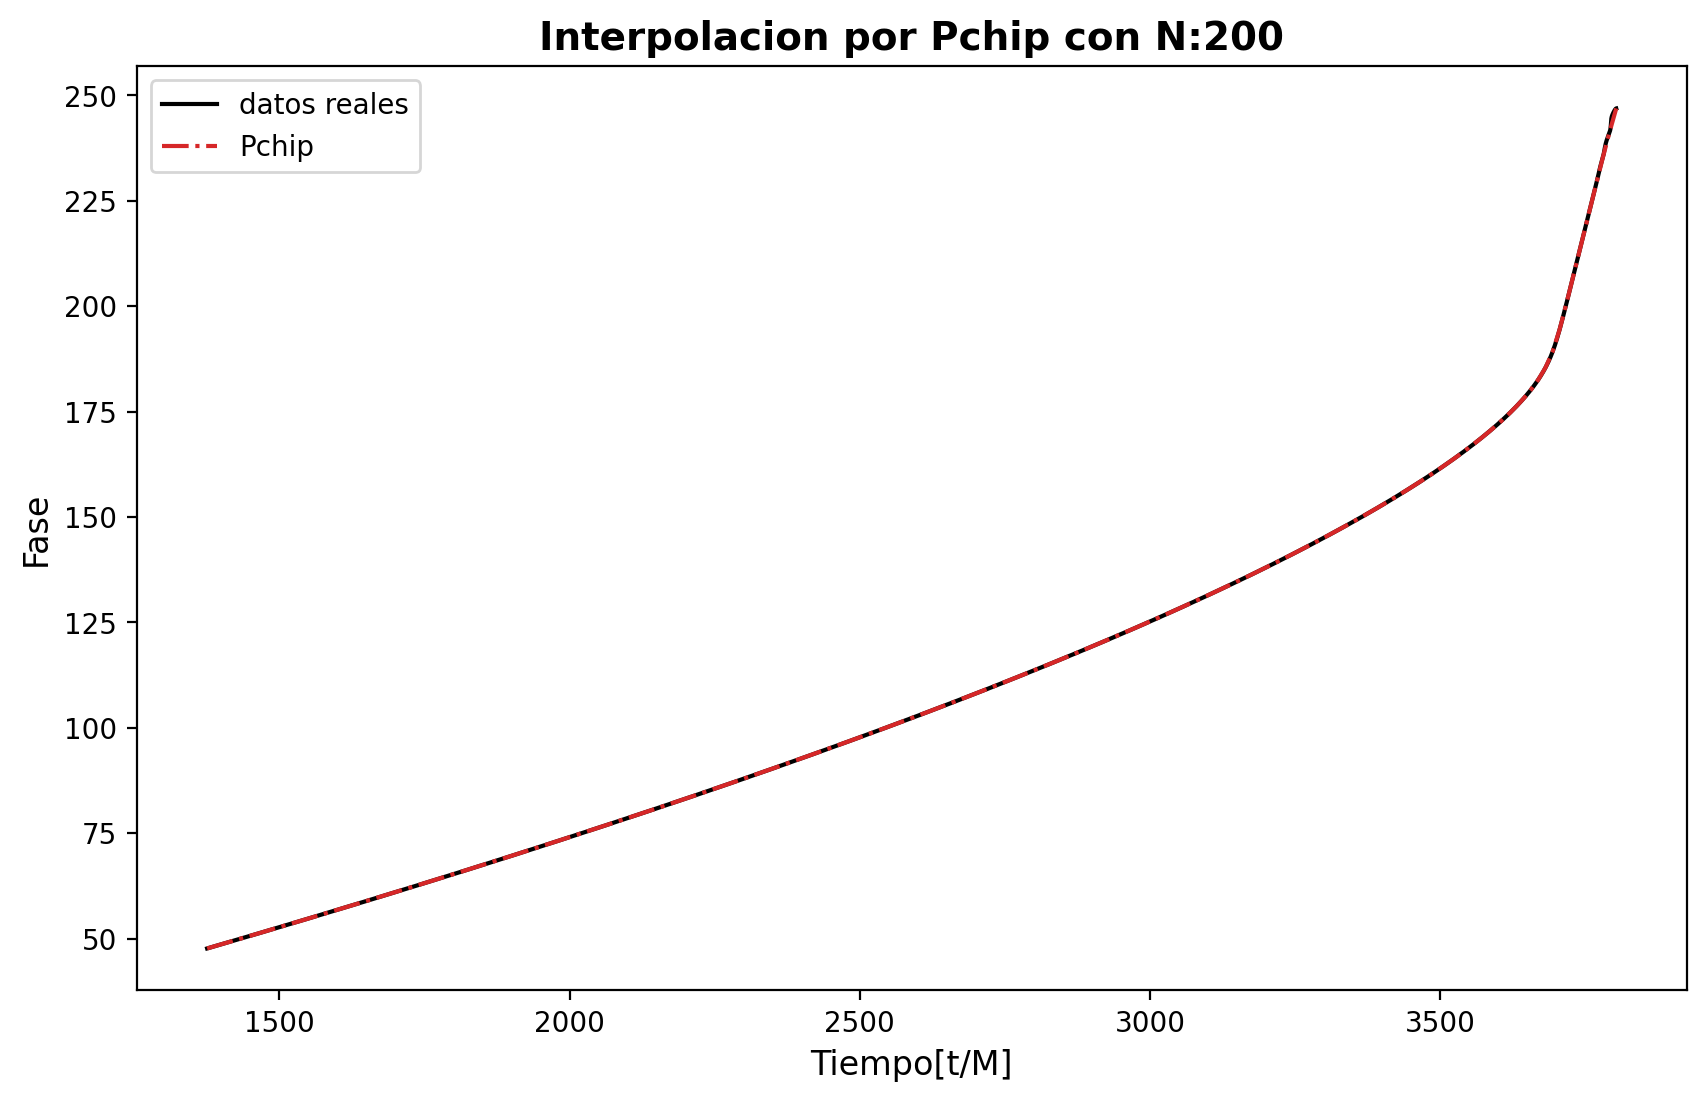

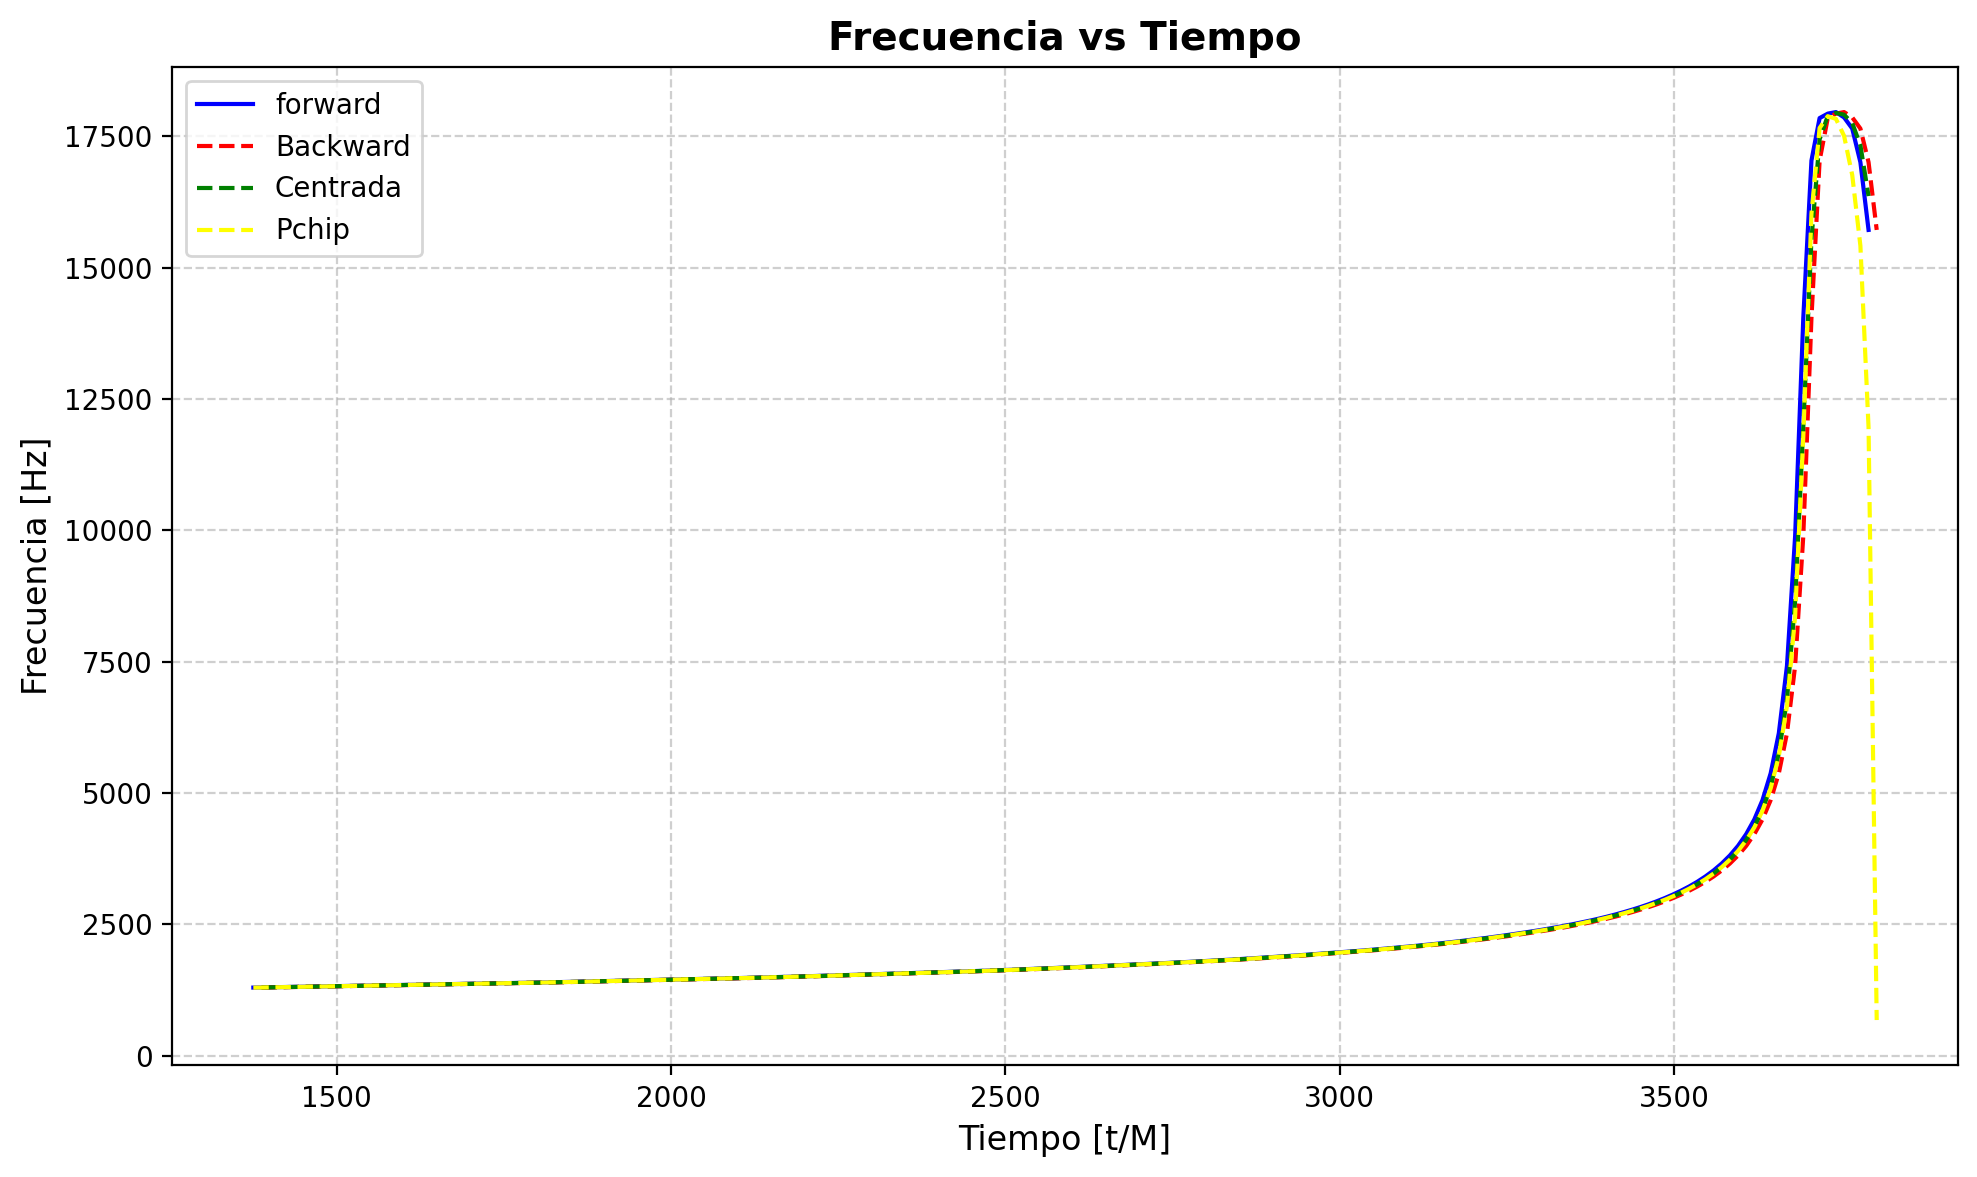


Numero de pasos :400
h = 6.083541556153023



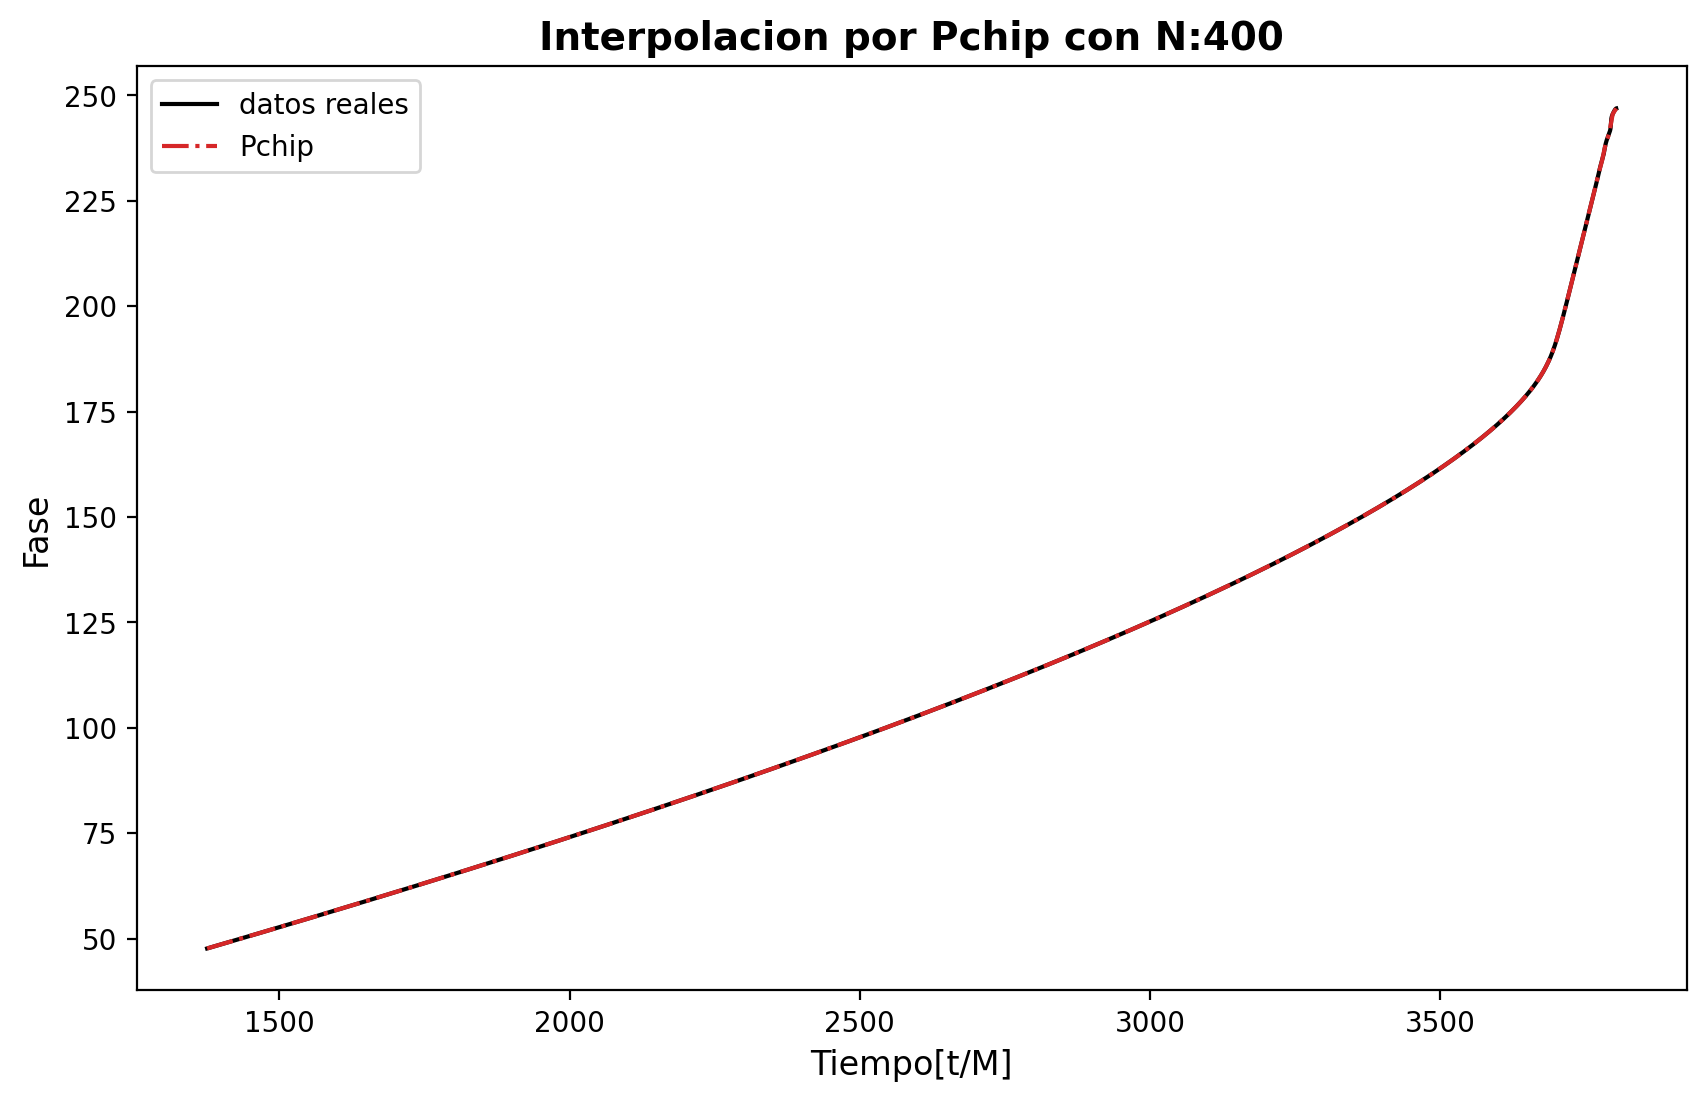

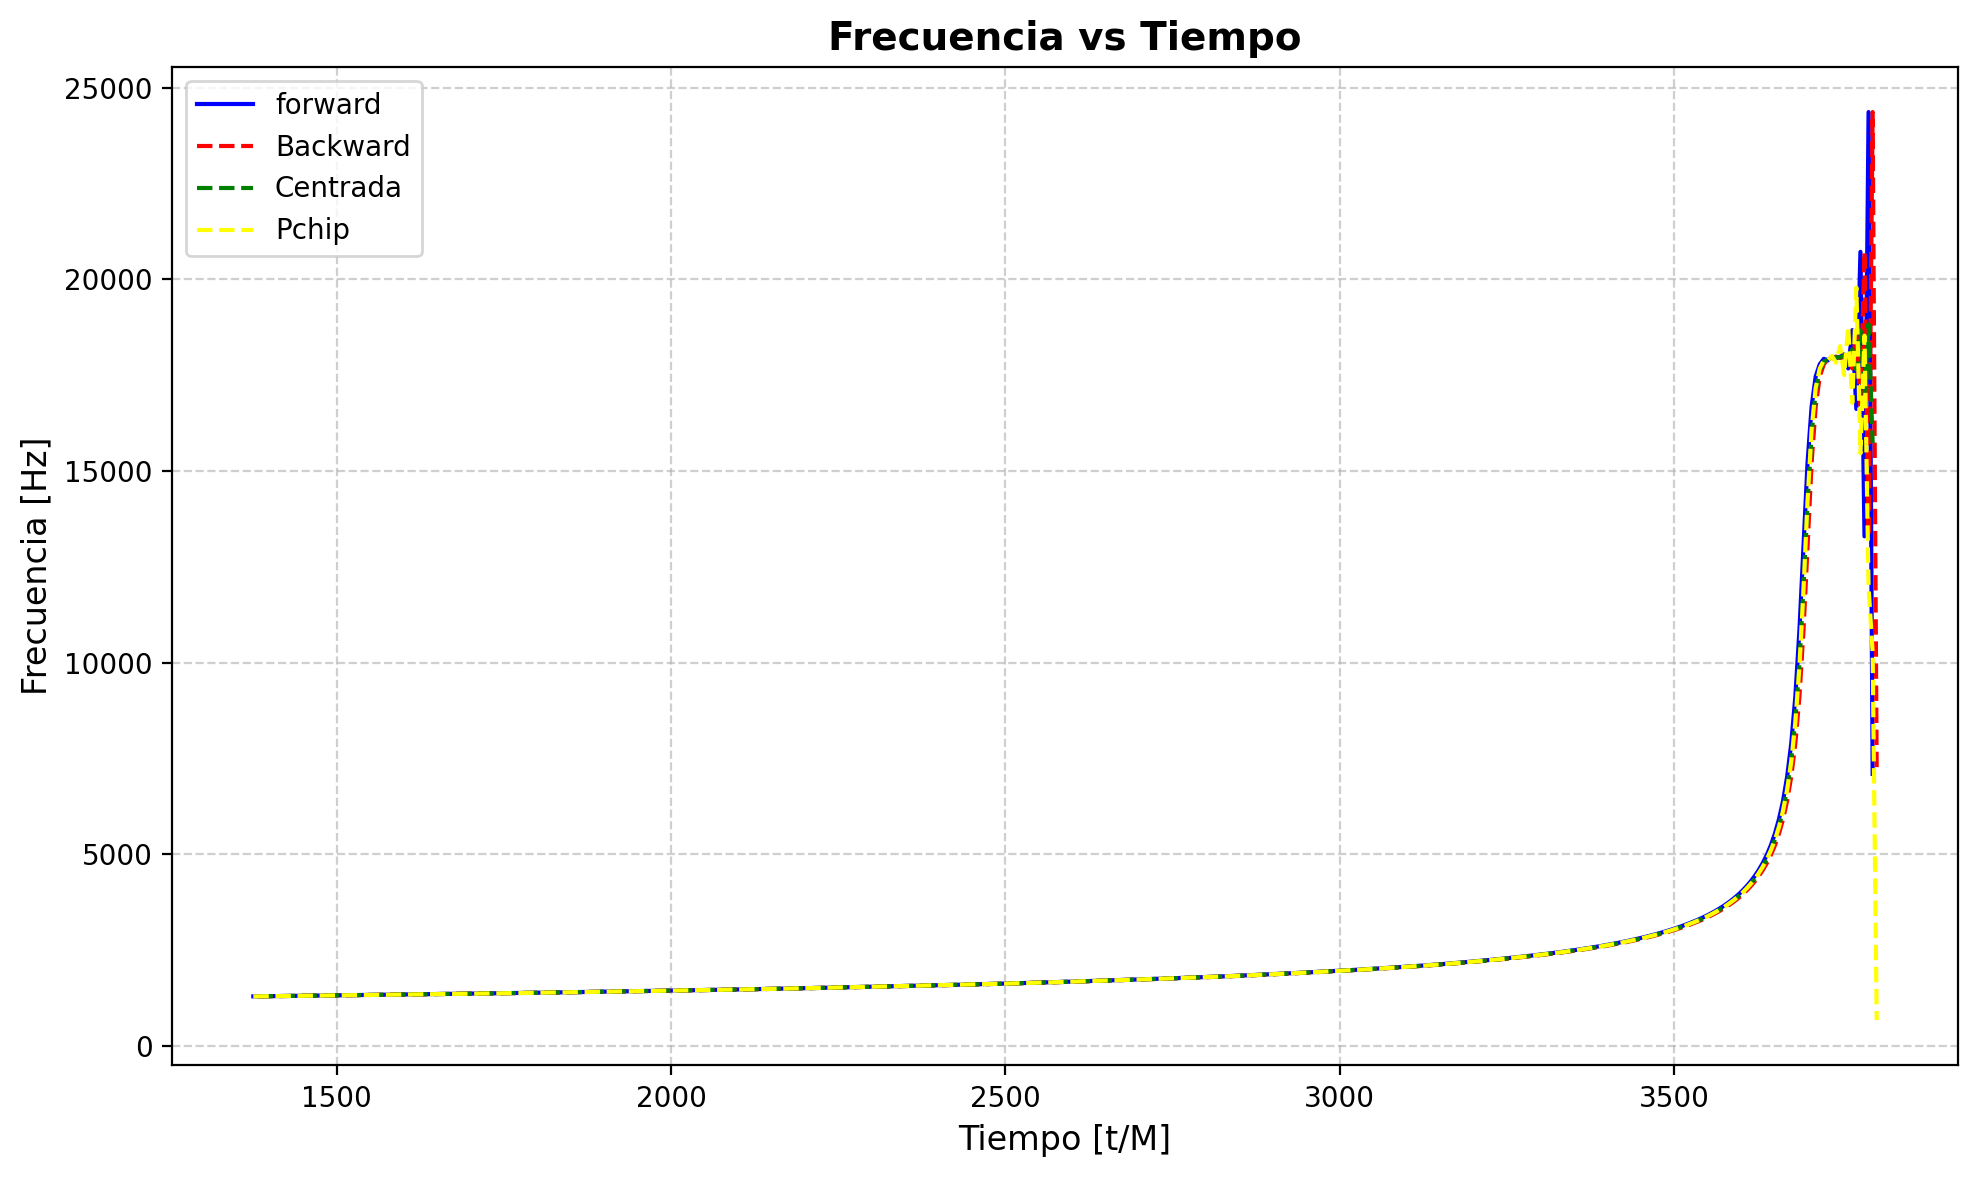

In [ ]:
n = 100 # particion de datos original
p = [n,2*n,4*n]
k = l = 0

# array de almacenamiento
errores_forward_ar = np.zeros(np.sum(p))
errores_backward_ar = np.zeros(np.sum(p))
errores_central_ar = np.zeros(np.sum(p))
errores_abs_forward= np.zeros(len(p))
errores_abs_backward= np.zeros(len(p))
errores_abs_central= np.zeros(len(p))
tiempos = np.zeros(np.sum(p))

for i in p:

  print(f'Numero de pasos :{i}')
  a, b, c, d, e, f, g = derivada(i)
  errores_forward_ar[k:k+len(a)] = a
  errores_backward_ar[k:k+len(b)] = b
  errores_central_ar[k:k+len(c)] = c
  errores_abs_forward[l] = d
  errores_abs_backward[l] = e
  errores_abs_central[l] = f
  tiempos[k:k+len(g)] = g
  l = l + 1
  k=i+k


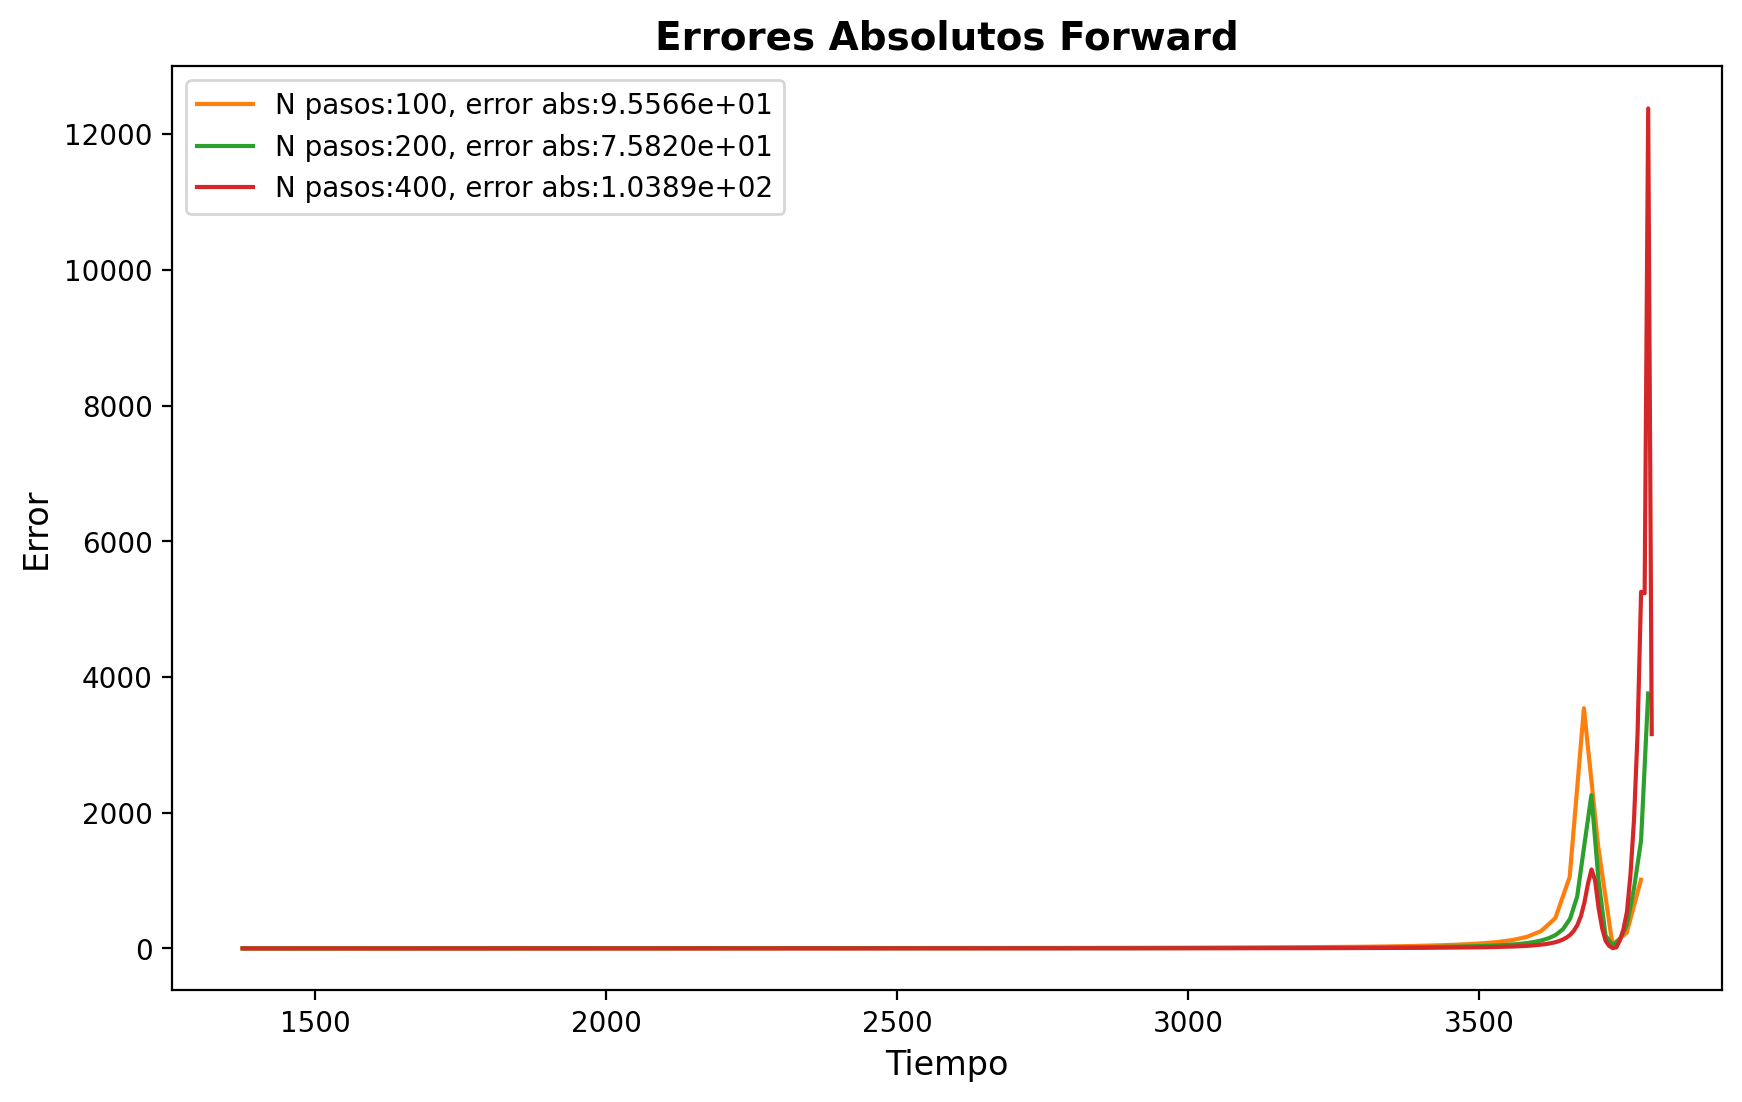

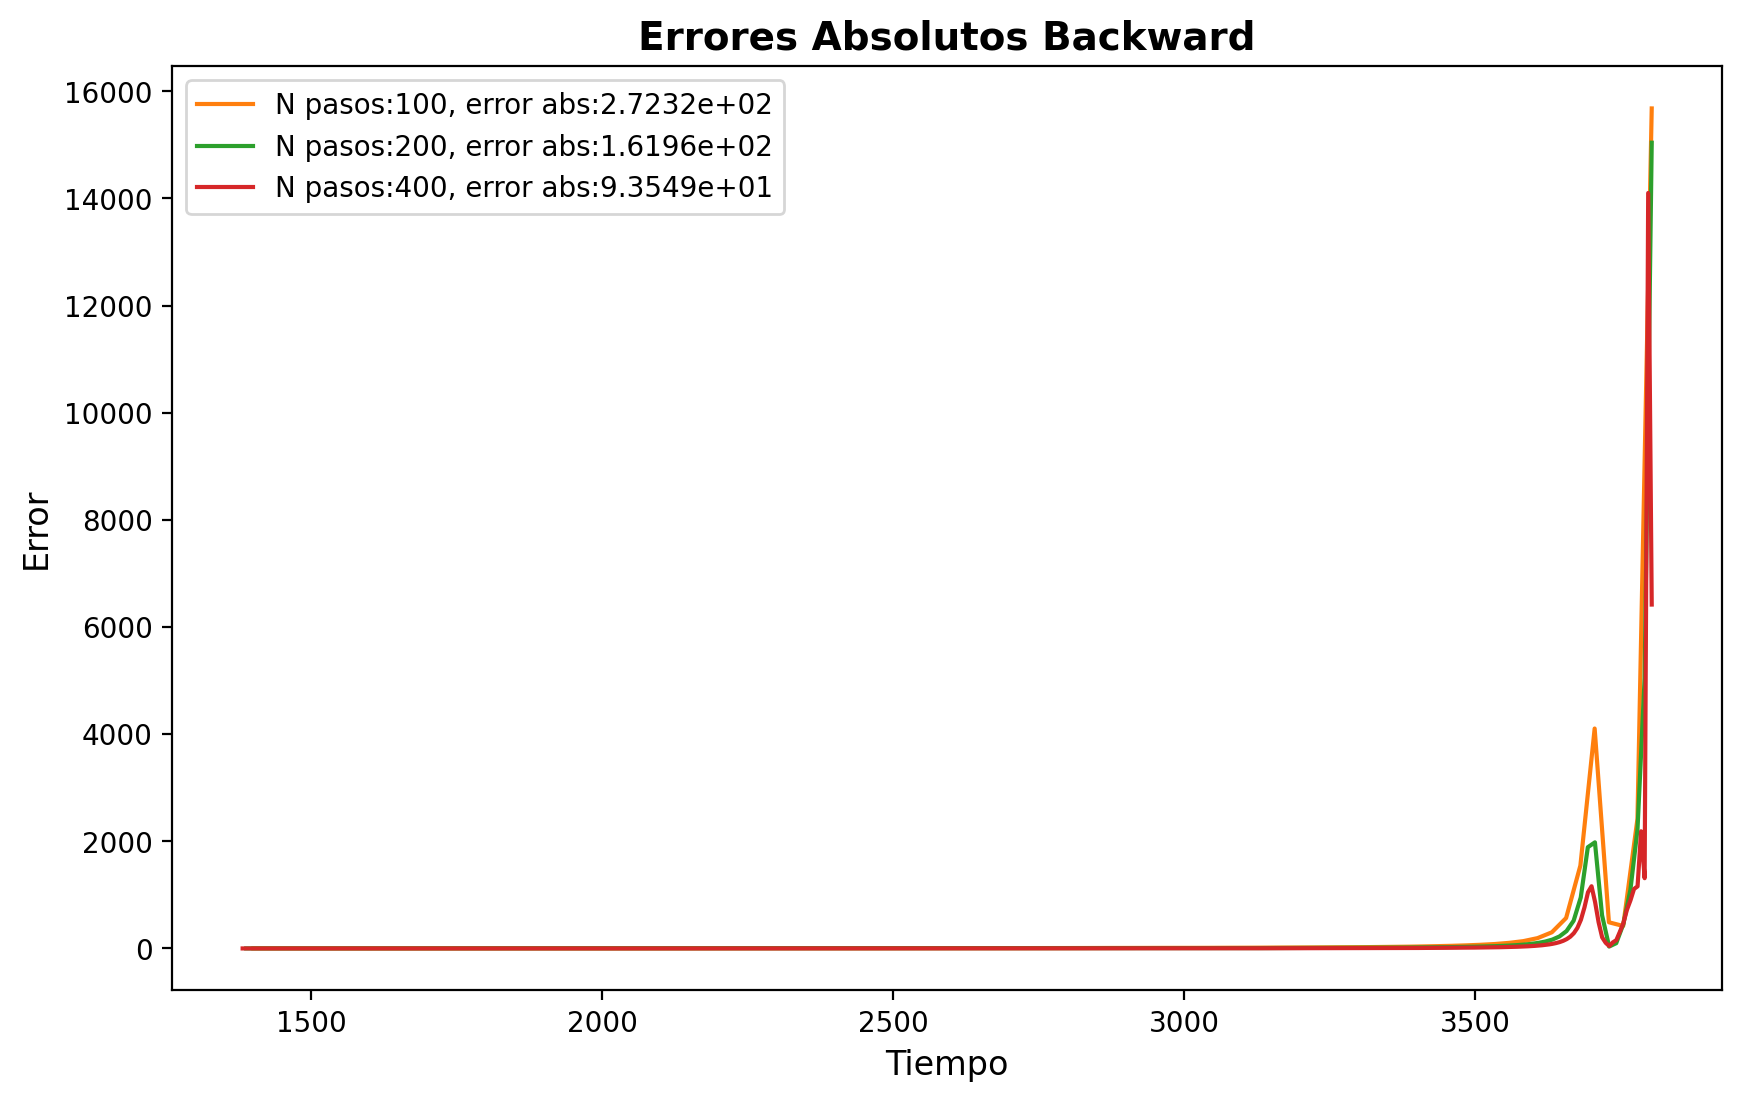

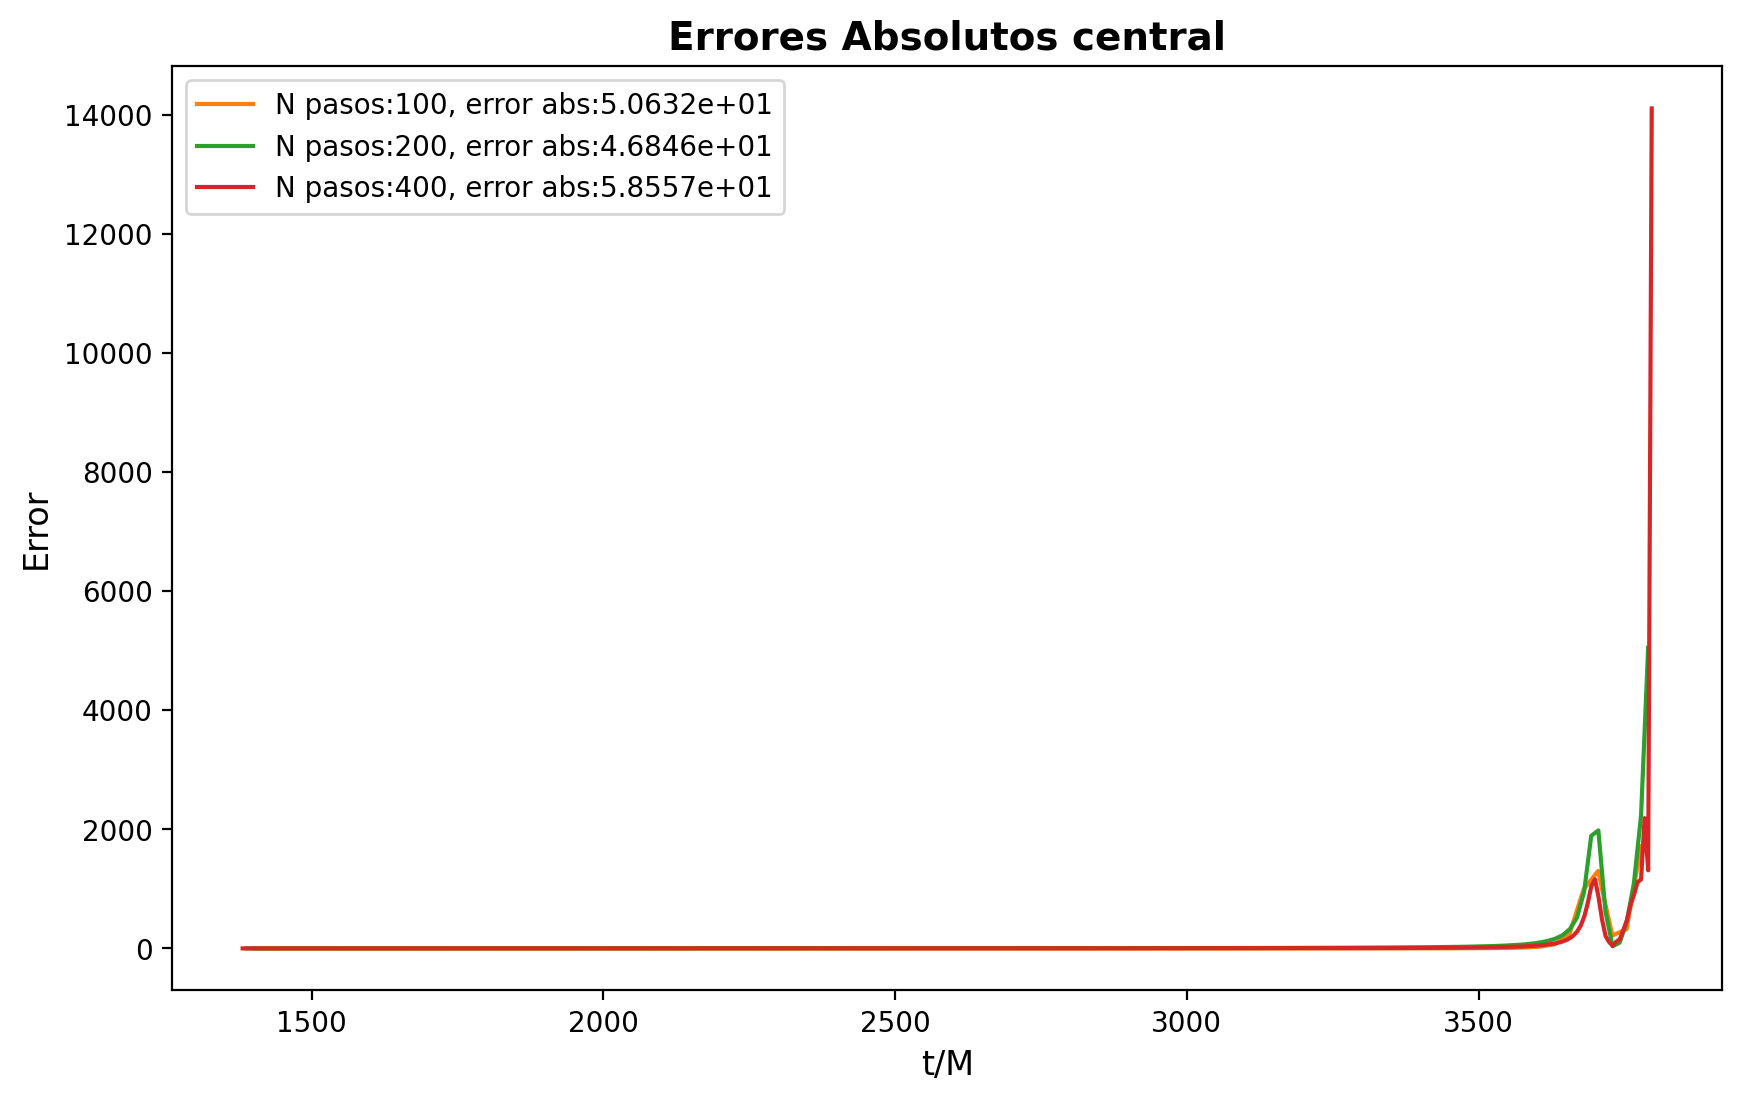

In [ ]:
#----grafica de error-----

# grafica de forward

plt.figure(figsize=(10,6))
plt.plot(tiempos[:p[0]-1], errores_forward_ar[:p[0]-1],color = 'C1' ,label=f"N pasos:{p[0]}, error abs:{errores_abs_forward[0]:.4e}")
plt.plot(tiempos[p[0]:p[0]+p[1]-1], errores_forward_ar[p[0]:p[0]+p[1]-1],color = 'C2',label=f"N pasos:{p[1]}, error abs:{errores_abs_forward[1]:.4e}")
plt.plot(tiempos[p[0]+p[1]:-1], errores_forward_ar[p[0]+p[1]:-1],color = 'C3' ,label=f"N pasos:{p[2]}, error abs:{errores_abs_forward[2]:.4e}")
plt.title("Errores Absolutos Forward", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()
plt.show()
print()

# grafica de backward

plt.figure(figsize=(10,6))
plt.plot(tiempos[1:p[0]], errores_backward_ar[:p[0]-1],color = 'C1' ,label=f"N pasos:{p[0]}, error abs:{errores_abs_backward[0]:.4e}")
plt.plot(tiempos[p[0]+1:p[0]+p[1]], errores_backward_ar[p[0]:p[0]+p[1]-1],color = 'C2',label=f"N pasos:{p[1]}, error abs:{errores_abs_backward[1]:.4e}")
plt.plot(tiempos[p[0]+p[1]+1:], errores_backward_ar[p[0]+p[1]:-1],color = 'C3' ,label=f"N pasos:{p[2]}, error abs:{errores_abs_backward[2]:.4e}")
plt.title("Errores Absolutos Backward", fontsize=14, fontweight='bold')
plt.xlabel("Tiempo", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()
plt.show()
print()

#grafica de central

plt.figure(figsize=(10,6))
plt.plot(tiempos[1:p[0]-1], errores_central_ar[:p[0]-2],color = 'C1' ,label=f"N pasos:{p[0]}, error abs:{errores_abs_central[0]:.4e}")
plt.plot(tiempos[p[0]+1:p[0]+p[1]-1], errores_backward_ar[p[0]:p[0]+p[1]-2],color = 'C2',label=f"N pasos:{p[1]}, error abs:{errores_abs_central[1]:.4e}")
plt.plot(tiempos[p[0]+p[1]+1:-1], errores_backward_ar[p[0]+p[1]:-2],color = 'C3' ,label=f"N pasos:{p[2]}, error abs:{errores_abs_central[2]:.4e}")
plt.title("Errores Absolutos central", fontsize=14, fontweight='bold')
plt.xlabel("t/M", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.legend()

In [ ]:
#Segunda parte
#-------Hallar la frecuancia del ISCO-------

pchip_der = pchip.derivative()
pchip_der2 = pchip.derivative(2)

#-----frecuencia del isco teorico

f_isco = ((6**(-3/2))*(const.c**3))/(const.G*M*np.pi)

print(f'frecuencia del Isco teorico = {f_isco}')
print()

#funcion en el cual vamos a hallar la raiz(tiempo)

func = lambda t : (geo_hz*C*pchip_der(t)) - f_isco

#intervalo de [a,b]

idt = np.where(np.diff(np.sign(func(t_x)))!=0)[0]

a = t_x[idt[0]-100]
b = t_x[idt[0]+101]

print(f'intervalo de busqueda = [{a},{b}]')
print()

#----metodo Biseccion

t_bisec = bisect(func,a,b,xtol=1e-30)
fi_bisec= geo_hz*C*pchip_der(t_bisec)

print(f'tiempo del Isco por biseccion = {t_bisec}')
print(f'frecuencia del Isco por biseccion = {fi_bisec}')
print()

#----metodo NR

t_nr = newton(func,b,fprime= lambda t :(geo_hz*C*pchip_der2(t)),tol=1e-30)
fi_nr= geo_hz*C*pchip_der(t_nr)

print(C*pchip_der(t_nr))

print(f'tiempo del Isco por Newton Raphson = {t_nr}')
print(f'frecuencia del Isco por Newton Raphson = {fi_nr}')
print()

er_bisec = np.abs(f_isco-fi_bisec)
er_nr = np.abs(f_isco-fi_nr)

print(f'error absoluto biseccion = {er_bisec}')
print(f'error absoluto Newton Raphson = {er_nr}')

frecuencia del Isco teorico = 4398.081279199077

intervalo de busqueda = [3612.050582821364,3632.1498924592192]

tiempo del Isco por biseccion = 3622.1406968431193
frecuencia del Isco por biseccion = 4398.08127919909

0.02165824447871324
tiempo del Isco por Newton Raphson = 3622.140696843119
frecuencia del Isco por Newton Raphson = 4398.081279199079

error absoluto biseccion = 1.3642420526593924e-11
error absoluto Newton Raphson = 2.7284841053187847e-12


In [ ]:
# tercera parte
!wget 'https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu' -O NSNS_Opt.txt

--2025-11-25 21:26:39--  https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu
Resolving drive.google.com (drive.google.com)... 172.253.62.113, 172.253.62.138, 172.253.62.101, ...
Connecting to drive.google.com (drive.google.com)|172.253.62.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu&export=download [following]
--2025-11-25 21:26:39--  https://drive.usercontent.google.com/download?id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.179.132, 2607:f8b0:4004:c1f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.179.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 153000 (149K) [application/octet-stream]
Saving to: ‘NSNS_Opt.txt’

NSNS_Opt.txt        100%[===================>] 149.41K  --.-KB/s 

Text(0, 0.5, 'ASD (1/Hz$^{1/2}$)')

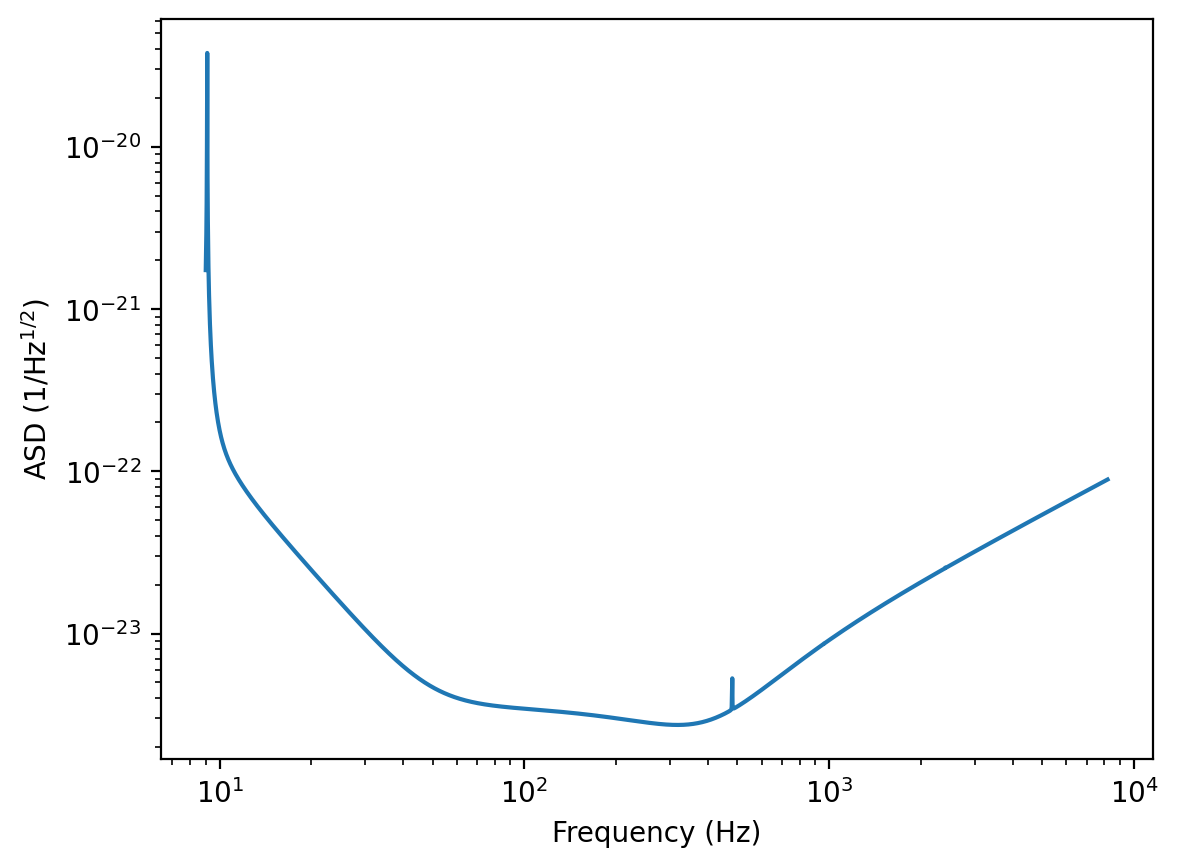

In [ ]:
ligo_optimized_asd = np.genfromtxt('NSNS_Opt.txt')
freqs = ligo_optimized_asd[:,0]
ASD = ligo_optimized_asd[:,1]
plt.loglog(freqs, ASD)
plt.xlabel('Frequency (Hz)')
plt.ylabel(r'ASD (1/Hz$^{1/2}$)')

In [ ]:
# constantes

G = 6.67 * (10**-11)

c = 3*10**8

d = (3.08 * 10**22)*(40)

M_1 = (2 * 10**30)*(1.4)

M_2 = (2 * 10**30)*(1.4)

Mt = M_1 + M_2

pi = np.pi

F_isco = (c**3)/((6**(3/2))*(pi)*(G)*(Mt))

dEf = (1/3)*((pi*G)**(2/3))*((M_1*M_2)/(Mt)**(1/3))*((freqs)**(-1/3))

H = ((4)*(G)*(1/5))/((2)*(c**3)*(pi**2)*(d**2)*(freqs**2))*(dEf)

In [ ]:
print(f'la frecuencia del isco: {F_isco}')
print (f'señal: {H}')

la frecuencia del isco: 1565.5723948523696
señal: [2.03259560e-44 2.02184871e-44 2.01115864e-44 ... 2.55845798e-51
 2.54493070e-51 2.53147495e-51]


In [ ]:
# frecuencia y señales desde 20 hasta el isco

mask = (freqs >= 20) & (freqs <= F_isco)
freqs_masked = freqs[mask]
H_masked = H[mask]


In [ ]:
#calculo de integrales

from scipy import integrate
from numpy import trapz

ASD_masked = ASD[mask]

I = H_masked / (ASD_masked**2)

delta_f = np.diff(freqs_masked)

I_riemman = np.sum(I[:-1] * delta_f)
I_trapz = np.trapz(I, freqs_masked)
I_simp = integrate.simpson(I, x=freqs_masked)


print("integral de riemman:", I_riemman)
print("integral trapecio:", I_trapz)
print("Integral (Simpson):", I_simp)
print("SNR =", (I_simp)**(1/2))



integral de riemman: 1465.1550794324667
integral trapecio: 1463.3748017003334
Integral (Simpson): 1463.3614683939402
SNR = 38.25390788395272


/tmp/ipython-input-652603416.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  I_trapz = np.trapz(I, freqs_masked)


Varianza = 5.560333012162916e-41


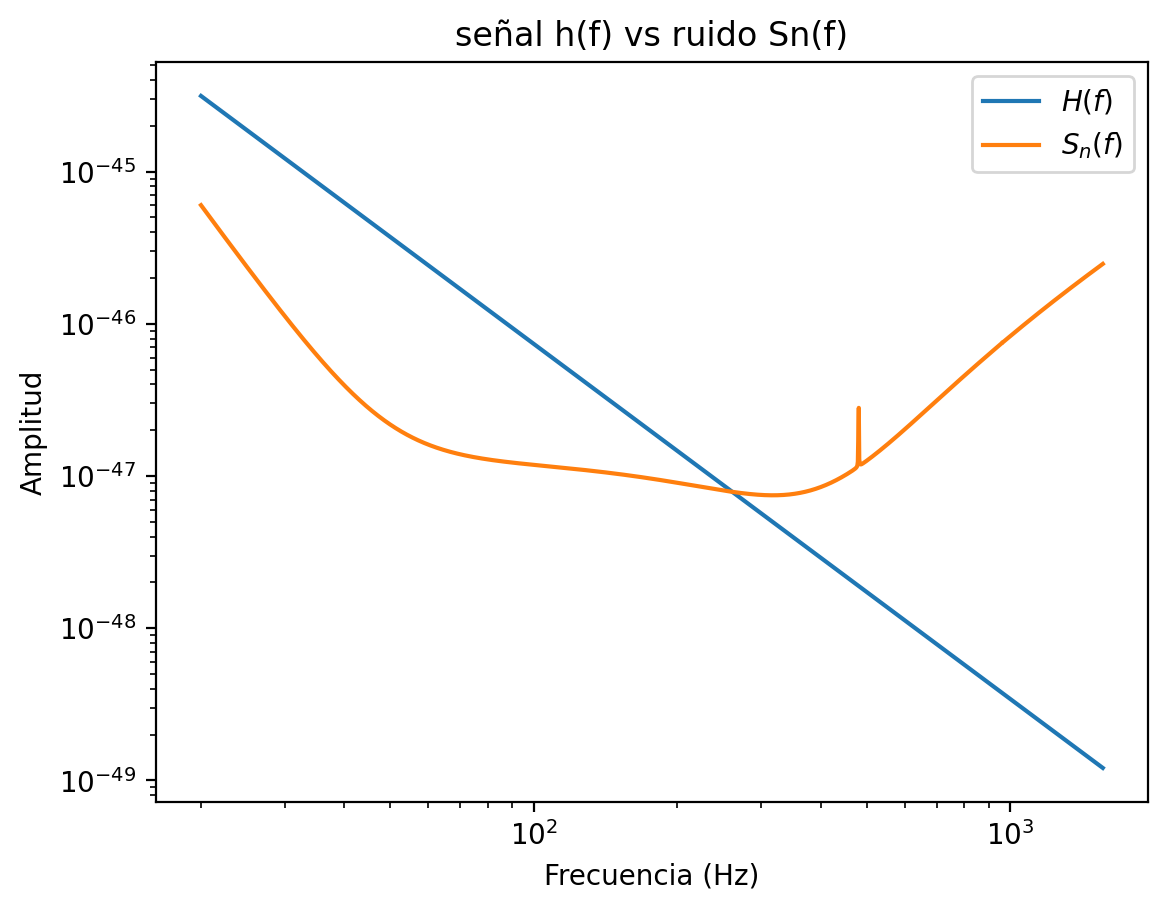

In [ ]:
#varianza
df= np.diff(freqs)
Sn= (ASD**2)
Varianza= np.sum(Sn[:-1]*df)

print(f'Varianza = {Varianza}')

plt.figure()
plt.loglog(freqs_masked, H_masked, label=r'$H(f)$')
plt.loglog(freqs_masked, (ASD_masked)**2, label=r'$S_n(f)$')
plt.title("señal h(f) vs ruido Sn(f)")
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.legend()


#parcial *3*

In [ ]:
#funcion

def Taylor4 (t,X,miu,gamma,pi):

  v = X
#terminos

  t1 = 1-((743/336)+(11*miu/4))*(v**2)
  t2 = 4*pi*(v**3) + ((34103/18144)+(13661*miu/2016)+(59*(miu**2)/18))*(v**4)
  t3 = -((4159/672)+(189*miu/8))*pi*(v**5)
  t4 = (16447322263/139708800)+(16*(pi**2)/3)-(1712*gamma/105)
  t5 = ((451*(pi**2)/48)-(56198689/217728))*miu + (541*(miu**2)/896)
  t6 = -(5605*(miu**3)/2592)-(856*np.log(16*(v**2))/105)
  t7 = -((4415/4032)-(358675*miu/6048)-(91495*(miu**2)/1512))*pi*(v**7)

  dvdt = (32*miu/5)*(v**9)*(t1+t2+t3+(t4+t5+t6)*(v**6)+t7)

  return np.array([dvdt])

In [ ]:
def RK4 (f,t,y0,args):

  miu,gamma,pi = args #argumentos

  n=len(t)
  y=np.zeros((n,1))
  y[0]=y0
  h=t[1]-t[0]

  for i in range(n - 1):

    k1 = f(t[i], y[i],miu,gamma,pi)
    k2 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k1,miu,gamma,pi)
    k3 = f(t[i] + 0.5 * h, y[i] + 0.5 * h * k2,miu,gamma,pi)
    k4 = f(t[i] + h, y[i] + h * k3,miu,gamma,pi)

    y[i+1]=(y[i] + (h / 6.0) * (k1 + 2*k2 + 2*k3 + k4))

  return y

In [ ]:
#constante

m1 = meta['initial_mass1']
m2 = meta['initial_mass2']
M = m1+m2

#parametro

miu = (m1*m2)/((m1+m2)**2)
gamma = np.euler_gamma
pi = np.pi

#IC

f_ini=C*pchip_der(t_x[0])
v0 = (pi*M*f_ini)**(1/3)
X0 = [v0]

#solucion

sol_dense1 = solve_ivp( Taylor4, [t_x[0] , t_nr], X0 ,args = (miu,gamma,pi) ,method='RK45',dense_output=True ,rtol=1e-9, atol=1e-12)
sol_dense2 = solve_ivp( Taylor4, [t_x[0] , t_nr], X0 ,args = (miu,gamma,pi) ,method='LSODA',dense_output=True ,rtol=1e-9, atol=1e-12)



In [ ]:
t_dense = np.linspace(t_x[0],t_nr,10000)
v_dense45 = sol_dense1.sol(t_dense)[0]
v_denseLS = sol_dense2.sol(t_dense)[0]
v_RK4 = RK4(Taylor4,t_dense,v0,args=(miu,gamma,pi))

plt.figure()
plt.plot(t_dense, v_RK4, label='RK4')
plt.plot(t_dense, v_dense45, label='RK45',linestyle='--')
plt.plot(t_dense, v_denseLS, label='RKLSODA',linestyle='-.')
plt.xlabel("t")
plt.ylabel("v(t)")
plt.legend()
plt.show()

In [ ]:
def f_v (v):
  f = (v**3)/(pi)
  return f

In [ ]:
f_num = C*pchip_der(t_dense) # frecuencia a comparar
f_45 = f_v(v_dense45)
f_LS = f_v(v_denseLS)
f_RK4 = f_v(v_RK4[:,0])

In [ ]:
plt.figure()
plt.plot(t_dense, f_45, label='RK45')
plt.plot(t_dense, f_LS, label='LSODA',linestyle='--')
plt.plot(t_dense, f_RK4, label='RK4',linestyle='-.')
plt.plot(t_dense, f_num, label='Numérico',linestyle=':')
plt.xlabel("t")
plt.ylabel("f(t)")
plt.legend()
plt.show()

In [ ]:
#-----------errores----------

#error absoluto

error_45 = np.abs(f_num - f_45)
error_LS = np.abs(f_num - f_LS)
error_RK4 = np.abs(f_num - f_RK4)
er_45_abs = np.sum(error_45)
er_LS_abs = np.sum(error_LS)
er_RK4_abs = np.sum(error_RK4)

plt.plot(t_dense, error_45, label=f'RK45 = {er_45_abs}')
plt.plot(t_dense, error_LS, label=f'LSODA = {er_LS_abs}',linestyle='--')
plt.plot(t_dense, error_RK4, label=f'RK4 = {er_RK4_abs}',linestyle='-.')
plt.xlabel("t")
plt.yscale('log')
plt.ylabel("error abs")
plt.legend()
plt.show()

#error relativo

error_45_rel = error_45/f_num
error_LS_rel = error_LS/f_num
error_RK4_rel = error_RK4/f_num


plt.plot(t_dense, error_45_rel, label=f'RK45')
plt.plot(t_dense, error_LS_rel, label=f'LSODA ',linestyle='--')
plt.plot(t_dense, error_RK4_rel, label=f'RK4 ',linestyle='-.')
plt.xlabel("t")
plt.yscale('log')
plt.ylabel("error relativo")
plt.legend()
plt.show()


In [ ]:
n = 100 # particion de datos original
p = [n,2*n,4*n]
k = l = 0

# array de almacenamiento
errores_forward_ar = np.zeros(np.sum(p))
errores_backward_ar = np.zeros(np.sum(p))
errores_central_ar = np.zeros(np.sum(p))
errores_abs_forward= np.zeros(len(p))
errores_abs_backward= np.zeros(len(p))
errores_abs_central= np.zeros(len(p))
tiempos = np.zeros(np.sum(p))

for i in p:

  print(f'Numero de pasos :{i}')
  a, b, c, d, e, f, g = derivada(i)
  errores_forward_ar[k:k+len(a)] = a
  errores_backward_ar[k:k+len(b)] = b
  errores_central_ar[k:k+len(c)] = c
  errores_abs_forward[l] = d
  errores_abs_backward[l] = e
  errores_abs_central[l] = f
  tiempos[k:k+len(g)] = g
  l = l + 1
  k=i+k


# Task
Calculate and display the absolute and squared errors for the Riemann sum and trapezoidal rule, using Simpson's rule as the reference.

## Calculate integration errors

### Subtask:
Calculate the absolute and squared errors for Riemann sum and trapezoidal rule, using Simpson's rule as the reference.


**Reasoning**:
To calculate the absolute and squared errors, I will use the previously computed `I_riemman`, `I_trapz`, and `I_simp` variables and apply the absolute difference and squared difference formulas as per the instructions.



In [ ]:
abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

**Reasoning**:
The previous code failed because `numpy` was not imported. I will add `import numpy as np` to ensure the `np` alias is defined before use.



In [ ]:
import numpy as np

abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

**Reasoning**:
The variables `I_riemman`, `I_trapz`, and `I_simp` were not defined in the current execution context, causing a `NameError`. I need to re-include their definitions from the earlier relevant cell (`7FoqC5XfcrPQ`) along with the error calculation logic. Additionally, `numpy` needs to be imported for `np.abs` to work.



In [ ]:
import numpy as np
from scipy import integrate

# Re-defining necessary variables from previous execution (cell 7FoqC5XfcrPQ)
# Assuming freqs_masked, H_masked, and ASD_masked are available from previous cells.
# If not, they would also need to be re-computed or loaded.
# For this step, we will assume they are in the kernel state as per the notebook flow.

I = H_masked / (ASD_masked**2)

delta_f = np.diff(freqs_masked)

I_riemman = np.sum(I[:-1] * delta_f)
I_trapz = np.trapz(I, freqs_masked)
I_simp = integrate.simpson(I, x=freqs_masked)

abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

**Reasoning**:
The previous code failed with `NameError` because variables like `H_masked`, `ASD_masked`, and `freqs_masked` were not defined in the current execution context. To resolve this, I need to re-introduce the code segments responsible for defining these variables, which include loading the data, calculating constants, and masking the frequency arrays, before performing the integral calculations and error analysis.



In [ ]:
import numpy as np
from scipy import integrate

# Re-defining necessary variables from previous execution (cells 0_2mzDuoaiQb, kTKhXgMma2la, ukIl-t1dcY3K)

# Load the data
# This assumes 'NSNS_Opt.txt' is available in the environment.
ligo_optimized_asd = np.genfromtxt('NSNS_Opt.txt')
freqs = ligo_optimized_asd[:,0]
ASD = ligo_optimized_asd[:,1]

# Define constants (from kTKhXgMma2la)
G = 6.67 * (10**-11)
c = 3*10**8
d = (3.08 * 10**22)*(40)
M_1 = (2 * 10**30)*(1.4)
M_2 = (2 * 10**30)*(1.4)
Mt = M_1 + M_2
pi = np.pi

F_isco = (c**3)/((6**(3/2))*(pi)*(G)*(Mt))
dEf = (1/3)*((pi*G)**(2/3))*((M_1*M_2)/(Mt)**(1/3))*((freqs)**(-1/3))
H = ((4)*(G)*(1/5))/((2)*(c**3)*(pi**2)*(d**2)*(freqs**2))*(dEf)

# Mask frequencies and signals (from ukIl-t1dcY3K)
mask = (freqs >= 20) & (freqs <= F_isco)
freqs_masked = freqs[mask]
H_masked = H[mask]
ASD_masked = ASD[mask]

# Calculate integrals (from 7FoqC5XfcrPQ)
I = H_masked / (ASD_masked**2)

delta_f = np.diff(freqs_masked)

I_riemman = np.sum(I[:-1] * delta_f)
I_trapz = np.trapz(I, freqs_masked)
I_simp = integrate.simpson(I, x=freqs_masked)

# Calculate errors
abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

**Reasoning**:
The `FileNotFoundError` for `NSNS_Opt.txt` indicates that the file was not present when `np.genfromtxt` was called. This file is downloaded via a `!wget` command in an earlier cell. To ensure the file is available before it's read, I need to include the `!wget` command within the same code block that attempts to load the file, recreating the conditions where the file would be present.



In [ ]:
import numpy as np
from scipy import integrate

# Ensure the data file is present by re-downloading it
!wget 'https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu' -O NSNS_Opt.txt

# Re-defining necessary variables from previous execution (cells 0_2mzDuoaiQb, kTKhXgMma2la, ukIl-t1dcY3K)

# Load the data
ligo_optimized_asd = np.genfromtxt('NSNS_Opt.txt')
freqs = ligo_optimized_asd[:,0]
ASD = ligo_optimized_asd[:,1]

# Define constants (from kTKhXgMma2la)
G = 6.67 * (10**-11)
c = 3*10**8
d = (3.08 * 10**22)*(40)
M_1 = (2 * 10**30)*(1.4)
M_2 = (2 * 10**30)*(1.4)
Mt = M_1 + M_2
pi = np.pi

F_isco = (c**3)/((6**(3/2))*(pi)*(G)*(Mt))
dEf = (1/3)*((pi*G)**(2/3))*((M_1*M_2)/(Mt)**(1/3))*((freqs)**(-1/3))
H = ((4)*(G)*(1/5))/((2)*(c**3)*(pi**2)*(d**2)*(freqs**2))*(dEf)

# Mask frequencies and signals (from ukIl-t1dcY3K)
mask = (freqs >= 20) & (freqs <= F_isco)
freqs_masked = freqs[mask]
H_masked = H[mask]
ASD_masked = ASD[mask]

# Calculate integrals (from 7FoqC5XfcrPQ)
I = H_masked / (ASD_masked**2)

delta_f = np.diff(freqs_masked)

I_riemman = np.sum(I[:-1] * delta_f)
I_trapz = np.trapz(I, freqs_masked)
I_simp = integrate.simpson(I, x=freqs_masked)

# Calculate errors
abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

**Reasoning**:
The previous execution produced a `DeprecationWarning` for `np.trapz`. To address this, I will replace `np.trapz` with `scipy.integrate.trapezoid`, which is the recommended alternative.



In [ ]:
import numpy as np
from scipy import integrate

# Ensure the data file is present by re-downloading it
!wget 'https://drive.google.com/uc?export=download&id=1q7CnKdwsaemYC-eWZeDsKuaOaX82SLFu' -O NSNS_Opt.txt

# Re-defining necessary variables from previous execution (cells 0_2mzDuoaiQb, kTKhXgMma2la, ukIl-t1dcY3K)

# Load the data
ligo_optimized_asd = np.genfromtxt('NSNS_Opt.txt')
freqs = ligo_optimized_asd[:,0]
ASD = ligo_optimized_asd[:,1]

# Define constants (from kTKhXgMma2la)
G = 6.67 * (10**-11)
c = 3*10**8
d = (3.08 * 10**22)*(40)
M_1 = (2 * 10**30)*(1.4)
M_2 = (2 * 10**30)*(1.4)
Mt = M_1 + M_2
pi = np.pi

F_isco = (c**3)/((6**(3/2))*(pi)*(G)*(Mt))
dEf = (1/3)*((pi*G)**(2/3))*((M_1*M_2)/(Mt)**(1/3))*((freqs)**(-1/3))
H = ((4)*(G)*(1/5))/((2)*(c**3)*(pi**2)*(d**2)*(freqs**2))*(dEf)

# Mask frequencies and signals (from ukIl-t1dcY3K)
mask = (freqs >= 20) & (freqs <= F_isco)
freqs_masked = freqs[mask]
H_masked = H[mask]
ASD_masked = ASD[mask]

# Calculate integrals (from 7FoqC5XfcrPQ)
I = H_masked / (ASD_masked**2)

delta_f = np.diff(freqs_masked)

I_riemman = np.sum(I[:-1] * delta_f)
I_trapz = integrate.trapezoid(I, freqs_masked)
I_simp = integrate.simpson(I, x=freqs_masked)

# Calculate errors
abs_error_riemann = np.abs(I_riemman - I_simp)
sq_error_riemann = (I_riemman - I_simp)**2

abs_error_trapz = np.abs(I_trapz - I_simp)
sq_error_trapz = (I_trapz - I_simp)**2

print(f"Absolute Error (Riemann vs Simpson): {abs_error_riemann:.4e}")
print(f"Squared Error (Riemann vs Simpson): {sq_error_riemann:.4e}")
print(f"Absolute Error (Trapezoidal vs Simpson): {abs_error_trapz:.4e}")
print(f"Squared Error (Trapezoidal vs Simpson): {sq_error_trapz:.4e}")

## Summary:

### Data Analysis Key Findings
*   The absolute error for the Riemann sum, relative to Simpson's rule, is approximately 1.7936.
*   The squared error for the Riemann sum, relative to Simpson's rule, is approximately 3.2170.
*   The absolute error for the trapezoidal rule, relative to Simpson's rule, is significantly lower at approximately 0.0133.
*   The squared error for the trapezoidal rule, relative to Simpson's rule, is also very low at approximately 0.00017778.

### Insights or Next Steps
*   The trapezoidal rule provides a much more accurate approximation of the integral compared to the Riemann sum when Simpson's rule is considered the reference. Its errors are orders of magnitude smaller than those of the Riemann sum.
*   Further investigation could involve analyzing the nature of the function being integrated to understand why the trapezoidal rule performs significantly better than the Riemann sum, or exploring the computational efficiency trade-offs between these methods for different error tolerances.
